In [1]:
from IPython.display import Image
from glob import glob
import pandas as pd
import numpy as np
import os
from pathlib import Path
import subprocess
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

In [2]:
#os.environ["PYSPARK_GATEWAY_PORT"]=45323
#os.environ["PYSPARK_GATEWAY_SECRET"]=1f5c85fdccaec5212a9cb3beadf12b67308ab20df4a4a43b00c0d91e7c6c6855
#os.environ["PYSPARK_PIN_THREAD"]=true

spark = SparkSession.builder.appName('MastersProject').getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/04/04 13:07:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
taxon = '\"Escherichia coli\"'
pwd = "/home/infosebi/Documents/MastersProject"
number_of_genomes=5

In [4]:
# Parameters
taxon = "'Thermoanaerobacterium'"
pwd = "/home/infosebi/Documents/Programmieren/MastersProject/thermoanaerobacterium"
number_of_genomes = 5


In [5]:
os.chdir(pwd)
taxon_file = taxon.lower().replace(" ", "_").replace("\'", "")
subprocess.run(f"""ncbi-datasets summary genome taxon {str(taxon)} --assembly-level complete --assembly-source genbank --annotated>  {taxon_file}.json""", shell=True)
p = subprocess.Popen(f"""jq '.total_count' {taxon_file}.json""", stdout=subprocess.PIPE, shell=True)
print(p.stdout.read().decode('ascii').strip())

New version of client (14.20.0) available at https://ftp.ncbi.nlm.nih.gov/pub/datasets/command-line/LATEST/linux-amd64/datasets


5


In [6]:
subprocess.run(f"cat {taxon_file}.json | jq -r '.reports[] | [.accession, .organism.infraspecific_names.strain, .organism.tax_id, .assembly_stats.total_sequence_length, .assembly_stats.gc_count, .assembly_stats.contig_n50, .annotation_info.stats.gene_counts.total] | @tsv' | head -{number_of_genomes} > info_table.tsv", shell=True) 

CompletedProcess(args="cat thermoanaerobacterium.json | jq -r '.reports[] | [.accession, .organism.infraspecific_names.strain, .organism.tax_id, .assembly_stats.total_sequence_length, .assembly_stats.gc_count, .assembly_stats.contig_n50, .annotation_info.stats.gene_counts.total] | @tsv' | head -5 > info_table.tsv", returncode=0)

In [7]:
subprocess.run(f"cat {taxon_file}.json | jq -r '.reports[]| .accession' | head -{number_of_genomes} > accession_list.txt", shell=True)

CompletedProcess(args="cat thermoanaerobacterium.json | jq -r '.reports[]| .accession' | head -5 > accession_list.txt", returncode=0)

In [8]:
subprocess.run(f"ncbi-datasets download genome accession --include gbff --inputfile accession_list.txt --filename {taxon_file}.zip", shell=True)

New version of client (14.20.0) available at https://ftp.ncbi.nlm.nih.gov/pub/datasets/command-line/LATEST/linux-amd64/datasets


Downloading: thermoanaerobacterium.zip    6.51kB 35.7MB/s
Downloading: thermoanaerobacterium.zip    6.51kB 35.7MB/s
Downloading: thermoanaerobacterium.zip    6.51kB 35.7MB/s
Downloading: thermoanaerobacterium.zip    6.51kB 35.7MB/s
Downloading: thermoanaerobacterium.zip    6.51kB 35.7MB/s
Downloading: thermoanaerobacterium.zip    6.51kB 35.7MB/s
Downloading: thermoanaerobacterium.zip    6.51kB 35.7MB/s
Downloading: thermoanaerobacterium.zip    6.51kB 35.7MB/s
Downloading: thermoanaerobacterium.zip    6.51kB 35.7MB/s
Downloading: thermoanaerobacterium.zip    6.51kB 35.7MB/s
Downloading: thermoanaerobacterium.zip    6.51kB 35.7MB/s
Downloading: thermoanaerobacterium.zip    6.51kB 35.7MB/s
Downloading: thermoanaerobacterium.zip    6.51kB 35.7MB/s


Downloading: thermoanaerobacterium.zip    6.51kB 35.7MB/s
Downloading: thermoanaerobacterium.zip    32.8kB 217kB/s
Downloading: thermoanaerobacterium.zip    32.8kB 217kB/s
Downloading: thermoanaerobacterium.zip    32.8kB 217kB/s
Downloading: thermoanaerobacterium.zip    32.8kB 217kB/s
Downloading: thermoanaerobacterium.zip    32.8kB 217kB/s
Downloading: thermoanaerobacterium.zip    32.8kB 217kB/s
Downloading: thermoanaerobacterium.zip    32.8kB 217kB/s
Downloading: thermoanaerobacterium.zip    32.8kB 217kB/s
Downloading: thermoanaerobacterium.zip    32.8kB 217kB/s
Downloading: thermoanaerobacterium.zip    32.8kB 217kB/s
Downloading: thermoanaerobacterium.zip    32.8kB 217kB/s
Downloading: thermoanaerobacterium.zip    32.8kB 217kB/s
Downloading: thermoanaerobacterium.zip    32.8kB 217kB/s
Downloading: thermoanaerobacterium.zip    65.5kB 226kB/s
Downloading: thermoanaerobacterium.zip    65.5kB 226kB/s
Downloading: thermoanaerobacterium.zip    65.5kB 226kB/s
Downloading: thermoanaerobacte

Downloading: thermoanaerobacterium.zip    65.5kB 226kB/s
Downloading: thermoanaerobacterium.zip    65.5kB 226kB/s
Downloading: thermoanaerobacterium.zip    65.5kB 226kB/s
Downloading: thermoanaerobacterium.zip    65.5kB 226kB/s
Downloading: thermoanaerobacterium.zip    65.5kB 226kB/s
Downloading: thermoanaerobacterium.zip    65.5kB 226kB/s
Downloading: thermoanaerobacterium.zip    98.3kB 237kB/s
Downloading: thermoanaerobacterium.zip    131kB 306kB/s
Downloading: thermoanaerobacterium.zip    131kB 306kB/s
Downloading: thermoanaerobacterium.zip    131kB 306kB/s
Downloading: thermoanaerobacterium.zip    131kB 306kB/s
Downloading: thermoanaerobacterium.zip    131kB 306kB/s
Downloading: thermoanaerobacterium.zip    131kB 306kB/s
Downloading: thermoanaerobacterium.zip    131kB 306kB/s
Downloading: thermoanaerobacterium.zip    131kB 306kB/s
Downloading: thermoanaerobacterium.zip    131kB 306kB/s
Downloading: thermoanaerobacterium.zip    131kB 306kB/s
Downloading: thermoanaerobacterium.zip   

Downloading: thermoanaerobacterium.zip    262kB 463kB/s
Downloading: thermoanaerobacterium.zip    262kB 463kB/s
Downloading: thermoanaerobacterium.zip    262kB 463kB/s
Downloading: thermoanaerobacterium.zip    262kB 463kB/s
Downloading: thermoanaerobacterium.zip    262kB 463kB/s
Downloading: thermoanaerobacterium.zip    295kB 484kB/s
Downloading: thermoanaerobacterium.zip    295kB 484kB/s
Downloading: thermoanaerobacterium.zip    295kB 484kB/s
Downloading: thermoanaerobacterium.zip    295kB 484kB/s
Downloading: thermoanaerobacterium.zip    295kB 484kB/s
Downloading: thermoanaerobacterium.zip    295kB 484kB/s
Downloading: thermoanaerobacterium.zip    295kB 484kB/s
Downloading: thermoanaerobacterium.zip    295kB 484kB/s
Downloading: thermoanaerobacterium.zip    492kB 703kB/s
Downloading: thermoanaerobacterium.zip    524kB 744kB/s
Downloading: thermoanaerobacterium.zip    557kB 778kB/s
Downloading: thermoanaerobacterium.zip    557kB 778kB/s
Downloading: thermoanaerobacterium.zip    557kB 

Downloading: thermoanaerobacterium.zip    590kB 788kB/s
Downloading: thermoanaerobacterium.zip    590kB 788kB/s
Downloading: thermoanaerobacterium.zip    590kB 788kB/s
Downloading: thermoanaerobacterium.zip    590kB 788kB/s
Downloading: thermoanaerobacterium.zip    590kB 788kB/s
Downloading: thermoanaerobacterium.zip    623kB 753kB/s
Downloading: thermoanaerobacterium.zip    655kB 789kB/s
Downloading: thermoanaerobacterium.zip    819kB 965kB/s
Downloading: thermoanaerobacterium.zip    1.08MB 1.26MB/s
Downloading: thermoanaerobacterium.zip    1.08MB 1.26MB/s
Downloading: thermoanaerobacterium.zip    1.08MB 1.26MB/s
Downloading: thermoanaerobacterium.zip    1.18MB 1.33MB/s
Downloading: thermoanaerobacterium.zip    1.18MB 1.33MB/s
Downloading: thermoanaerobacterium.zip    1.18MB 1.33MB/s
Downloading: thermoanaerobacterium.zip    1.18MB 1.33MB/s
Downloading: thermoanaerobacterium.zip    1.18MB 1.33MB/s
Downloading: thermoanaerobacterium.zip    1.18MB 1.33MB/s
Downloading: thermoanaerobacte

Downloading: thermoanaerobacterium.zip    1.34MB 1.37MB/s
Downloading: thermoanaerobacterium.zip    1.47MB 1.48MB/s
Downloading: thermoanaerobacterium.zip    1.74MB 1.72MB/s
Downloading: thermoanaerobacterium.zip    2.03MB 2.01MB/s
Downloading: thermoanaerobacterium.zip    2.1MB 2.05MB/s
Downloading: thermoanaerobacterium.zip    2.16MB 2.1MB/s
Downloading: thermoanaerobacterium.zip    2.23MB 2.14MB/s
Downloading: thermoanaerobacterium.zip    2.23MB 2.14MB/s
Downloading: thermoanaerobacterium.zip    2.23MB 2.14MB/s
Downloading: thermoanaerobacterium.zip    2.23MB 2.14MB/s
Downloading: thermoanaerobacterium.zip    2.23MB 2.14MB/s
Downloading: thermoanaerobacterium.zip    2.23MB 2.14MB/s
Downloading: thermoanaerobacterium.zip    2.33MB 2.09MB/s
Downloading: thermoanaerobacterium.zip    2.49MB 2.22MB/s
Downloading: thermoanaerobacterium.zip    2.75MB 2.44MB/s
Downloading: thermoanaerobacterium.zip    2.92MB 2.55MB/s
Downloading: thermoanaerobacterium.zip    3.34MB 2.9MB/s
Downloading: ther

Downloading: thermoanaerobacterium.zip    3.9MB 3.3MB/s
Downloading: thermoanaerobacterium.zip    3.9MB 3.3MB/s
Downloading: thermoanaerobacterium.zip    3.9MB 3.3MB/s
Downloading: thermoanaerobacterium.zip    3.9MB 3.3MB/s
Downloading: thermoanaerobacterium.zip    3.9MB 3.3MB/s
Downloading: thermoanaerobacterium.zip    3.9MB 3.3MB/s
Downloading: thermoanaerobacterium.zip    4.06MB 3.24MB/s
Downloading: thermoanaerobacterium.zip    4.26MB 3.37MB/s
Downloading: thermoanaerobacterium.zip    4.33MB 3.41MB/s
Downloading: thermoanaerobacterium.zip    4.46MB 3.47MB/s
Downloading: thermoanaerobacterium.zip    4.65MB 3.59MB/s
Downloading: thermoanaerobacterium.zip    4.69MB 3.61MB/s
Downloading: thermoanaerobacterium.zip    4.69MB 3.61MB/s
Downloading: thermoanaerobacterium.zip    4.69MB 3.61MB/s
Downloading: thermoanaerobacterium.zip    4.69MB 3.61MB/s
Downloading: thermoanaerobacterium.zip    4.69MB 3.61MB/s
Downloading: thermoanaerobacterium.zip    4.69MB 3.61MB/s
Downloading: thermoanaerob

Downloading: thermoanaerobacterium.zip    4.69MB 3.61MB/s
Downloading: thermoanaerobacterium.zip    4.69MB 3.61MB/s
Downloading: thermoanaerobacterium.zip    4.69MB 3.61MB/s
Downloading: thermoanaerobacterium.zip    4.78MB 3.34MB/s
Downloading: thermoanaerobacterium.zip    5.05MB 3.5MB/s
Downloading: thermoanaerobacterium.zip    5.34MB 3.67MB/s
Downloading: thermoanaerobacterium.zip    5.73MB 3.91MB/s
Downloading: thermoanaerobacterium.zip    6.32MB 4.28MB/s
Downloading: thermoanaerobacterium.zip    6.36MB 4.31MB/s
Downloading: thermoanaerobacterium.zip    6.36MB 4.31MB/s
Downloading: thermoanaerobacterium.zip    6.36MB 4.31MB/s
Downloading: thermoanaerobacterium.zip    6.36MB 4.31MB/s
Downloading: thermoanaerobacterium.zip    6.36MB 4.31MB/s
Downloading: thermoanaerobacterium.zip    6.36MB 4.31MB/s
Downloading: thermoanaerobacterium.zip    6.36MB 4.31MB/s
Downloading: thermoanaerobacterium.zip    6.36MB 4.31MB/s
Downloading: thermoanaerobacterium.zip    6.36MB 4.31MB/s
Downloading: th

Downloading: thermoanaerobacterium.zip    6.98MB 4.37MB/s
Downloading: thermoanaerobacterium.zip    6.98MB 4.37MB/s
Downloading: thermoanaerobacterium.zip    6.98MB 4.37MB/s
Downloading: thermoanaerobacterium.zip    6.98MB 4.37MB/s
Downloading: thermoanaerobacterium.zip    6.98MB 4.37MB/s
Downloading: thermoanaerobacterium.zip    6.98MB 4.37MB/s
Downloading: thermoanaerobacterium.zip    6.98MB 4.37MB/s
Downloading: thermoanaerobacterium.zip    6.98MB 4.37MB/s
Downloading: thermoanaerobacterium.zip    6.98MB 4.37MB/s
Downloading: thermoanaerobacterium.zip    6.98MB 4.37MB/s
Downloading: thermoanaerobacterium.zip    6.98MB 4.37MB/s
Downloading: thermoanaerobacterium.zip    6.98MB 4.37MB/s
Downloading: thermoanaerobacterium.zip    6.98MB 4.37MB/s
Downloading: thermoanaerobacterium.zip    6.98MB 4.37MB/s
Downloading: thermoanaerobacterium.zip    7.05MB 4.05MB/s
Downloading: thermoanaerobacterium.zip    7.08MB 4.03MB/s
Downloading: thermoanaerobacterium.zip    7.08MB 4.03MB/s
Downloading: t

Downloading: thermoanaerobacterium.zip    7.08MB 4.03MB/s
Downloading: thermoanaerobacterium.zip    7.08MB 4.03MB/s
Downloading: thermoanaerobacterium.zip    7.08MB 4.03MB/s
Downloading: thermoanaerobacterium.zip    7.08MB 4.03MB/s
Downloading: thermoanaerobacterium.zip    7.14MB 3.86MB/s
Downloading: thermoanaerobacterium.zip    7.21MB 3.87MB/s
Downloading: thermoanaerobacterium.zip    7.37MB 3.94MB/s
Downloading: thermoanaerobacterium.zip    7.5MB 3.98MB/s
Downloading: thermoanaerobacterium.zip    7.86MB 4.15MB/s
Downloading: thermoanaerobacterium.zip    8.29MB 4.35MB/s
Downloading: thermoanaerobacterium.zip    8.65MB 4.53MB/s
Downloading: thermoanaerobacterium.zip    8.65MB 4.53MB/s
Downloading: thermoanaerobacterium.zip    8.65MB 4.53MB/s
Downloading: thermoanaerobacterium.zip    8.65MB 4.53MB/s
Downloading: thermoanaerobacterium.zip    8.65MB 4.53MB/s
Downloading: thermoanaerobacterium.zip    8.65MB 4.53MB/s
Downloading: thermoanaerobacterium.zip    8.65MB 4.53MB/s
Downloading: th

Downloading: thermoanaerobacterium.zip    9.01MB 4.48MB/s
Downloading: thermoanaerobacterium.zip    9.27MB 4.57MB/s
Downloading: thermoanaerobacterium.zip    9.5MB 4.66MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: th

Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: t

Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: t

Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: t

Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: t

Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: t

Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: t

Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: t

Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.63MB 4.71MB/s
Downloading: thermoanaerobacterium.zip    9.67MB 2.57MB/s
Downloading: thermoanaerobacterium.zip    9.67MB 2.57MB/s
Downloading: thermoanaerobacterium.zip    9.67MB 2.57MB/s
Downloading: thermoanaerobacterium.zip    9.67MB 2.57MB/s
Downloading: thermoanaerobacterium.zip    9.67MB 2.57MB/s
Downloading: thermoanaerobacterium.zip    9.67MB 2.57MB/s
Downloading: thermoanaerobacterium.zip    9.67MB 2.57MB/s
Downloading: thermoanaerobacterium.zip    9.67MB 2.57MB/s
Downloading: thermoanaerobacterium.zip    9.67MB 2.57MB/s
Downloading: t

Downloading: thermoanaerobacterium.zip    9.67MB 2.57MB/s
Downloading: thermoanaerobacterium.zip    9.67MB 2.57MB/s
Downloading: thermoanaerobacterium.zip    9.67MB 2.57MB/s
Downloading: thermoanaerobacterium.zip    9.67MB 2.57MB/s
Downloading: thermoanaerobacterium.zip    9.67MB 2.57MB/s
Downloading: thermoanaerobacterium.zip    9.67MB 2.57MB/s
Downloading: thermoanaerobacterium.zip    9.67MB 2.57MB/s
Downloading: thermoanaerobacterium.zip    9.67MB 2.57MB/s
Downloading: thermoanaerobacterium.zip    9.7MB 2.44MB/s
Downloading: thermoanaerobacterium.zip    9.7MB 2.44MB/s
Downloading: thermoanaerobacterium.zip    9.7MB 2.44MB/s
Downloading: thermoanaerobacterium.zip    9.7MB 2.44MB/s
Downloading: thermoanaerobacterium.zip    9.7MB 2.44MB/s
Downloading: thermoanaerobacterium.zip    9.7MB 2.44MB/s
Downloading: thermoanaerobacterium.zip    9.7MB 2.44MB/s
Downloading: thermoanaerobacterium.zip    9.7MB 2.44MB/s
Downloading: thermoanaerobacterium.zip    9.7MB 2.44MB/s
Downloading: thermoanae

Downloading: thermoanaerobacterium.zip    9.7MB 2.44MB/s
Downloading: thermoanaerobacterium.zip    9.7MB 2.44MB/s
Downloading: thermoanaerobacterium.zip    9.7MB 2.44MB/s
Downloading: thermoanaerobacterium.zip    9.7MB 2.44MB/s
Downloading: thermoanaerobacterium.zip    9.7MB 2.44MB/s
Downloading: thermoanaerobacterium.zip    9.7MB 2.44MB/s
Downloading: thermoanaerobacterium.zip    9.7MB 2.44MB/s
Downloading: thermoanaerobacterium.zip    9.7MB 2.44MB/s
Downloading: thermoanaerobacterium.zip    9.76MB 2.34MB/s
Downloading: thermoanaerobacterium.zip    9.76MB 2.34MB/s
Downloading: thermoanaerobacterium.zip    9.76MB 2.34MB/s
Downloading: thermoanaerobacterium.zip    9.76MB 2.34MB/s
Downloading: thermoanaerobacterium.zip    9.76MB 2.34MB/s
Downloading: thermoanaerobacterium.zip    9.76MB 2.34MB/s
Downloading: thermoanaerobacterium.zip    9.76MB 2.34MB/s
Downloading: thermoanaerobacterium.zip    9.76MB 2.34MB/s
Downloading: thermoanaerobacterium.zip    9.76MB 2.34MB/s
Downloading: thermoana

Downloading: thermoanaerobacterium.zip    9.76MB 2.34MB/s
Downloading: thermoanaerobacterium.zip    9.86MB 2.28MB/s
Downloading: thermoanaerobacterium.zip    9.9MB 2.29MB/s
Downloading: thermoanaerobacterium.zip    9.9MB 2.29MB/s
Downloading: thermoanaerobacterium.zip    9.9MB 2.29MB/s
Downloading: thermoanaerobacterium.zip    9.9MB 2.29MB/s
Downloading: thermoanaerobacterium.zip    9.9MB 2.29MB/s
Downloading: thermoanaerobacterium.zip    9.9MB 2.29MB/s
Downloading: thermoanaerobacterium.zip    9.9MB 2.29MB/s
Downloading: thermoanaerobacterium.zip    9.9MB 2.29MB/s
Downloading: thermoanaerobacterium.zip    9.9MB 2.29MB/s
Downloading: thermoanaerobacterium.zip    9.9MB 2.29MB/s
Downloading: thermoanaerobacterium.zip    9.9MB 2.29MB/s
Downloading: thermoanaerobacterium.zip    9.9MB 2.29MB/s
Downloading: thermoanaerobacterium.zip    9.9MB 2.29MB/s
Downloading: thermoanaerobacterium.zip    9.9MB 2.29MB/s
Downloading: thermoanaerobacterium.zip    9.9MB 2.29MB/s
Downloading: thermoanaerobact

CompletedProcess(args='ncbi-datasets download genome accession --include gbff --inputfile accession_list.txt --filename thermoanaerobacterium.zip', returncode=0)

In [9]:
subprocess.run(f"unzip {taxon_file}.zip", shell=True)
subprocess.run(f"rm {taxon_file}.zip""", shell=True)

Archive:  thermoanaerobacterium.zip
  inflating: README.md               
  inflating: ncbi_dataset/data/assembly_data_report.jsonl  
  inflating: ncbi_dataset/data/GCA_000145615.1/genomic.gbff  
  inflating: ncbi_dataset/data/GCA_000189775.3/genomic.gbff  
  inflating: ncbi_dataset/data/GCA_000307585.2/genomic.gbff  
  inflating: ncbi_dataset/data/GCA_000328545.1/genomic.gbff  


  inflating: ncbi_dataset/data/GCA_002250075.1/genomic.gbff  
  inflating: ncbi_dataset/data/dataset_catalog.json  


CompletedProcess(args='rm thermoanaerobacterium.zip', returncode=0)

In [10]:
df = pd.read_table("info_table.tsv", header=None)
df.columns = ['Genome', 'Strain', 'Taxonomy Id', 'Sequence length', "GC Percent (%)", "ContigN50", "Gene count"]
df.set_index("Genome", inplace = True)
df["rRNA"]=np.nan
df["tRNA"]=np.nan

In [11]:
for i, row in df.iterrows():
    os.chdir(pwd + f"/ncbi_dataset/data/{i}")
    subprocess.run(f"""mv genomic.gbff {i}.gbff""", shell=True)
    subprocess.run(f"""mv {i}.gbff {pwd}/annotated_genomes""", shell=True)
os.chdir(pwd)
!rm -r ncbi_dataset
os.chdir(pwd + "/annotated_genomes")

In [12]:
subprocess.run(f"""zip ../{taxon_file}.zip *.gbff""", shell=True)

  adding: GCA_000145615.1.gbff

 (deflated 71%)
  adding: GCA_000189775.3.gbff

 (deflated 71%)
  adding: GCA_000307585.2.gbff

 (deflated 71%)
  adding: GCA_000328545.1.gbff

 (deflated 71%)
  adding: GCA_002250075.1.gbff

 (deflated 69%)


CompletedProcess(args='zip ../thermoanaerobacterium.zip *.gbff', returncode=0)

In [13]:
for i, row in df.iterrows():
    p = subprocess.Popen("""cat %s.gbff | grep rRNAs | head -1 | awk -F":: " '{ print $2}'""" %i, stdout=subprocess.PIPE, shell=True)
    rRNA = p.stdout.read().decode('ascii').strip()
    p = subprocess.Popen("""cat %s.gbff | grep tRNAs | head -1 | awk -F":: " '{ print $2}'""" %i, stdout=subprocess.PIPE, shell=True)
    tRNA = p.stdout.read().decode('ascii').strip()
    df.at[i, "rRNA"] = rRNA
    df.at[i, "tRNA"] = tRNA
    df.Strain = df.Strain.astype(str)
os.chdir(pwd)

In [14]:
df

,Strain,Taxonomy Id,Sequence length,GC Percent (%),ContigN50,Gene count,rRNA,tRNA
Genome,,,,,,,,
GCA_000307585.2,JW/SL-YS485,1094508,2837411,994235,2726530,2931,,
GCA_002250075.1,TG57,1517,2895726,987683,2895726,3042,,
GCA_000145615.1,DSM 571,580327,2785752,950290,2785752,2831,,
GCA_000328545.1,M0795,698948,2894276,975752,2783395,2919,,
GCA_000189775.3,LX-11,858215,2534358,886413,2534358,2492,,


In [15]:
df.reset_index(drop=False,inplace=True)
sparkDF_info=spark.createDataFrame(df) 
sparkDF_info.show()

/home/infosebi/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/home/infosebi/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


+---------------+-----------+-----------+---------------+--------------+---------+----------+----+----+
|         Genome|     Strain|Taxonomy Id|Sequence length|GC Percent (%)|ContigN50|Gene count|rRNA|tRNA|
+---------------+-----------+-----------+---------------+--------------+---------+----------+----+----+
|GCA_000307585.2|JW/SL-YS485|    1094508|        2837411|        994235|  2726530|      2931|    |    |
|GCA_002250075.1|       TG57|       1517|        2895726|        987683|  2895726|      3042|    |    |
|GCA_000145615.1|    DSM 571|     580327|        2785752|        950290|  2785752|      2831|    |    |
|GCA_000328545.1|      M0795|     698948|        2894276|        975752|  2783395|      2919|    |    |
|GCA_000189775.3|      LX-11|     858215|        2534358|        886413|  2534358|      2492|    |    |
+---------------+-----------+-----------+---------------+--------------+---------+----------+----+----+



In [16]:
columns = StructType([StructField('Name', StringType(), False),
                       StructField('Length', IntegerType(), False),
                       StructField('Start Pos', IntegerType(), False),
                       StructField('Annotation', StringType(), False),
                       StructField('Complement', StringType(), False),])


added_row=[]
for row_iterator in sparkDF_info.collect():
    file_path = pwd + f"/annotated_genomes/{row_iterator['Genome']}.gbff"
    for gb_obj in SeqIO.parse(file_path,'genbank'):
        all_cds = []
        for feature in gb_obj.features:
            if feature.type == "CDS":
                all_cds.append(feature)
        for cds in all_cds:
            if 'gene' in cds.qualifiers:
                gene = cds.qualifiers['gene'][0]
            else:
                gene = "-"
            if 'product' in cds.qualifiers:
                product = cds.qualifiers['product'][0]
            else:
                product = "-"
            complement = "forward"
            if cds.location.strand < 1:
                complement = "reverse"
            added_row.append([gene, cds.location.end-cds.location.start, int(cds.location.start) ,product, complement])
sparkDF_cds = spark.createDataFrame(added_row, columns)
sparkDF_cds.show()
print((sparkDF_cds.count(), len(sparkDF_cds.columns)))
#ec number, strain, species, go id, cog id, cazy, pfams, kegg pathway
#java jar cluster zip

+----+------+---------+--------------------+----------+
|Name|Length|Start Pos|          Annotation|Complement|
+----+------+---------+--------------------+----------+
|   -|   669|      109|metal dependent p...|   forward|
|   -|  1191|      884|S-adenosylmethion...|   reverse|
|   -|   504|     2380|        Rubrerythrin|   reverse|
|   -|   501|     2903|alkyl hydroperoxi...|   reverse|
|   -|  2370|     4208|hypothetical protein|   forward|
|   -|   666|     6599|hypothetical protein|   reverse|
|   -|   546|     7341|sporulation prote...|   forward|
|   -|  1455|     7891|Spore germination...|   reverse|
|   -|  1395|     9427|integral membrane...|   reverse|
|   -|   678|    10831|two component tra...|   reverse|
|   -|  1143|    11608|N-acetylglucosami...|   forward|
|   -|  1011|    12760|transcriptional r...|   reverse|
|   -|   135|    13900|hypothetical protein|   reverse|
|   -|   822|    14097|  Cof-like hydrolase|   reverse|
|   -|   672|    15121|protein of unknow...|   f

(13470, 5)


In [17]:
#file_path = pwd + f"/ncbi_dataset/GCA_000597845.1.gbff"
#gb_obj = SeqIO.read(file_path,'genbank')
#all_cds=[]
#for feature in gb_obj.features:
#    if feature.type=='CDS':
#        all_cds.append(feature)
#os.chdir(pwd + "/seq_files")
#
#records = []
#
#for i in range(len(all_cds)):
#    extracted_seq = all_cds[i].extract(gb_obj)
#    records.append(extracted_seq)
#
#with open("proteins.fasta", "w") as output:
#    SeqIO.write(records,output,format="fasta")


#os.chdir(pwd)

In [18]:
os.chdir(pwd + "/annotated_genomes")
!bp_genbank2gff3 --dir ./ --outdir ../gff_files
os.chdir(pwd + "/gff_files")
!for a in *.gbff.gff; do mv -- "$a" "${a%.gbff.gff}.gff"; done
os.chdir(pwd)

# Input: .//GCA_000189775.3.gbff


# working on region:CP002739, Thermoanaerobacterium xylanolyticum LX-11, Thermoanaerobacterium xylanolyticum LX-11, complete genome., 31-DEC-2013


# GFF3 saved to ../gff_files/GCA_000189775.3.gbff.gff
# Input: .//GCA_000307585.2.gbff


# working on region:CP003184, Thermoanaerobacterium saccharolyticum JW/SL-YS485, Thermoanaerobacterium saccharolyticum JW/SL-YS485, complete genome., 27-AUG-2014


# working on region:CP003185, Thermoanaerobacterium saccharolyticum JW/SL-YS485, Thermoanaerobacterium saccharolyticum JW/SL-YS485 plasmid pMU3262, complete genome., 26-JUL-2016


# working on region:CP003186, Thermoanaerobacterium phage THSA-485A, Thermoanaerobacterium phage THSA-485A, complete genome., 27-AUG-2014


# GFF3 saved to ../gff_files/GCA_000307585.2.gbff.gff


# Input: .//GCA_000328545.1.gbff


# working on region:CP003066, Thermoanaerobacterium thermosaccharolyticum M0795, Thermoanaerobacterium thermosaccharolyticum M0795, complete genome., 22-JUL-2013


# working on region:CP003067, Thermoanaerobacterium thermosaccharolyticum M0795, Thermoanaerobacterium thermosaccharolyticum M0795 plasmid pTHETHE01, complete sequence., 26-JUL-2016


# GFF3 saved to ../gff_files/GCA_000328545.1.gbff.gff


# Input: .//GCA_000145615.1.gbff


# working on region:CP002171, Thermoanaerobacterium thermosaccharolyticum DSM 571, Thermoanaerobacterium thermosaccharolyticum DSM 571, complete genome., 02-JAN-2014


# GFF3 saved to ../gff_files/GCA_000145615.1.gbff.gff


# Input: .//GCA_002250075.1.gbff


# working on region:CP016893, Thermoanaerobacterium thermosaccharolyticum, Thermoanaerobacterium thermosaccharolyticum strain TG57 chromosome, complete genome., 23-MAR-2022


# GFF3 saved to ../gff_files/GCA_002250075.1.gbff.gff


In [19]:
!roary -f gff_files/roary -p 8 -e -n -v gff_files/*.gff 

Use of uninitialized value in require at /home/infosebi/.conda/envs/roary/lib/perl5/5.22.0/x86_64-linux-thread-multi/Encode.pm line 59.



Please cite Roary if you use any of the results it produces:
    Andrew J. Page, Carla A. Cummins, Martin Hunt, Vanessa K. Wong, Sandra Reuter, Matthew T. G. Holden, Maria Fookes, Daniel Falush, Jacqueline A. Keane, Julian Parkhill,
	"Roary: Rapid large-scale prokaryote pan genome analysis", Bioinformatics, 2015 Nov 15;31(22):3691-3693
    doi: http://doi.org/10.1093/bioinformatics/btv421
	Pubmed: 26198102

2023/04/04 13:07:51 Output directory created: gff_files/roary
2023/04/04 13:07:51 Fixing input GFF files


2023/04/04 13:07:52 Input file contains duplicate gene IDs, attempting to fix by adding a unique suffix, new GFF in the fixed_input_files directory: /home/infosebi/Documents/Programmieren/MastersProject/thermoanaerobacterium/gff_files/GCA_000145615.1.gff 
2023/04/04 13:07:52 Renamed GFF file from: /home/infosebi/Documents/Programmieren/MastersProject/thermoanaerobacterium/gff_files/GCA_000145615.1.gff -> fixed_input_files/GCA_000145615.1.gff
2023/04/04 13:07:52 Locus tag used is 'ad4372dd6c0e02f4056d5abcc058849f' for file: /home/infosebi/Documents/Programmieren/MastersProject/thermoanaerobacterium/gff_files/GCA_000145615.1.gff


2023/04/04 13:07:53 Input file contains duplicate gene IDs, attempting to fix by adding a unique suffix, new GFF in the fixed_input_files directory: /home/infosebi/Documents/Programmieren/MastersProject/thermoanaerobacterium/gff_files/GCA_000189775.3.gff 
2023/04/04 13:07:53 Renamed GFF file from: /home/infosebi/Documents/Programmieren/MastersProject/thermoanaerobacterium/gff_files/GCA_000189775.3.gff -> fixed_input_files/GCA_000189775.3.gff
2023/04/04 13:07:53 Locus tag used is 'af9d275dc4cc622cb84d6cc9ce503ea4' for file: /home/infosebi/Documents/Programmieren/MastersProject/thermoanaerobacterium/gff_files/GCA_000189775.3.gff


2023/04/04 13:07:56 Input file contains duplicate gene IDs, attempting to fix by adding a unique suffix, new GFF in the fixed_input_files directory: /home/infosebi/Documents/Programmieren/MastersProject/thermoanaerobacterium/gff_files/GCA_000328545.1.gff 
2023/04/04 13:07:56 Renamed GFF file from: /home/infosebi/Documents/Programmieren/MastersProject/thermoanaerobacterium/gff_files/GCA_000328545.1.gff -> fixed_input_files/GCA_000328545.1.gff
2023/04/04 13:07:56 Locus tag used is '5840733bfae2da7714a13ada5e214277' for file: /home/infosebi/Documents/Programmieren/MastersProject/thermoanaerobacterium/gff_files/GCA_000328545.1.gff


2023/04/04 13:07:57 Extracting proteins from GFF files
Extracting proteins from fixed_input_files/GCA_000145615.1.gff
Extracting proteins from fixed_input_files/GCA_000189775.3.gff
Extracting proteins from /home/infosebi/Documents/Programmieren/MastersProject/thermoanaerobacterium/gff_files/GCA_000307585.2.gff
Extracting proteins from fixed_input_files/GCA_000328545.1.gff
Extracting proteins from /home/infosebi/Documents/Programmieren/MastersProject/thermoanaerobacterium/gff_files/GCA_002250075.1.gff


Academic tradition requires you to cite works you base your article on.
If you use programs that use GNU Parallel to process data for an article in a
scientific publication, please cite:

  Tange, O. (2023, January 22). GNU Parallel 20230122 ('Bolsonaristas').
  Zenodo. https://doi.org/10.5281/zenodo.7558957

This helps funding further development; AND IT WON'T COST YOU A CENT.
If you pay 10000 EUR you should feel free to use GNU Parallel without citing.

More about funding GNU Parallel and the citation notice:
https://www.gnu.org/software/parallel/parallel_design.html#citation-notice

To silence this citation notice: run 'parallel --citation' once.

Come on: You have run parallel 106 times. Isn't it about time 
you run 'parallel --citation' once to silence the citation notice?



Combine proteins into a single file


Iteratively run cd-hit


Academic tradition requires you to cite works you base your article on.
If you use programs that use GNU Parallel to process data for an article in a
scientific publication, please cite:

  Tange, O. (2023, January 22). GNU Parallel 20230122 ('Bolsonaristas').
  Zenodo. https://doi.org/10.5281/zenodo.7558957

This helps funding further development; AND IT WON'T COST YOU A CENT.
If you pay 10000 EUR you should feel free to use GNU Parallel without citing.

More about funding GNU Parallel and the citation notice:
https://www.gnu.org/software/parallel/parallel_design.html#citation-notice

To silence this citation notice: run 'parallel --citation' once.

Come on: You have run parallel 107 times. Isn't it about time 
you run 'parallel --citation' once to silence the citation notice?



Parallel all against all blast


Academic tradition requires you to cite works you base your article on.
If you use programs that use GNU Parallel to process data for an article in a
scientific publication, please cite:

  Tange, O. (2023, January 22). GNU Parallel 20230122 ('Bolsonaristas').
  Zenodo. https://doi.org/10.5281/zenodo.7558957

This helps funding further development; AND IT WON'T COST YOU A CENT.
If you pay 10000 EUR you should feel free to use GNU Parallel without citing.

More about funding GNU Parallel and the citation notice:
https://www.gnu.org/software/parallel/parallel_design.html#citation-notice

To silence this citation notice: run 'parallel --citation' once.

Come on: You have run parallel 108 times. Isn't it about time 
you run 'parallel --citation' once to silence the citation notice?



Academic tradition requires you to cite works you base your article on.
If you use programs that use GNU Parallel to process data for an article in a
scientific publication, please cite:

  Tange, O. (2023, January 22). GNU Parallel 20230122 ('Bolsonaristas').
  Zenodo. https://doi.org/10.5281/zenodo.7558957

This helps funding further development; AND IT WON'T COST YOU A CENT.
If you pay 10000 EUR you should feel free to use GNU Parallel without citing.

More about funding GNU Parallel and the citation notice:
https://www.gnu.org/software/parallel/parallel_design.html#citation-notice

To silence this citation notice: run 'parallel --citation' once.

Come on: You have run parallel 109 times. Isn't it about time 
you run 'parallel --citation' once to silence the citation notice?



Cluster with MCL


Academic tradition requires you to cite works you base your article on.
If you use programs that use GNU Parallel to process data for an article in a
scientific publication, please cite:

  Tange, O. (2023, January 22). GNU Parallel 20230122 ('Bolsonaristas').
  Zenodo. https://doi.org/10.5281/zenodo.7558957

This helps funding further development; AND IT WON'T COST YOU A CENT.
If you pay 10000 EUR you should feel free to use GNU Parallel without citing.

More about funding GNU Parallel and the citation notice:
https://www.gnu.org/software/parallel/parallel_design.html#citation-notice

To silence this citation notice: run 'parallel --citation' once.

Come on: You have run parallel 110 times. Isn't it about time 
you run 'parallel --citation' once to silence the citation notice?



2023/04/04 13:20:59 Running command: pan_genome_post_analysis -o clustered_proteins -p pan_genome.fa -s gene_presence_absence.csv -c _clustered.clstr --output_multifasta_files -i /home/infosebi/Documents/Programmieren/MastersProject/thermoanaerobacterium/gff_files/roary/rjbL33b52i//_gff_files -f /home/infosebi/Documents/Programmieren/MastersProject/thermoanaerobacterium/gff_files/roary/rjbL33b52i//_fasta_files -t 11  --dont_create_rplots   -v --mafft  -j Local --processors 8 --group_limit 50000 -cd 99


2023/04/04 13:21:00 Reinflate clusters


2023/04/04 13:21:00 Split groups with paralogs


2023/04/04 13:21:01 Labelling the groups
2023/04/04 13:21:01 Transfering the annotation to the groups


2023/04/04 13:21:11 Creating accessory binary gene presence and absence fasta


2023/04/04 13:21:11 Creating accessory binary gene presence and absence tree
2023/04/04 13:21:11 Running command: /home/infosebi/.conda/envs/roary/bin/FastTree -fastest -nt accessory_binary_genes.fa > accessory_binary_genes.fa.newick 


FastTree Version 2.1.11 Double precision (No SSE3)
Alignment: accessory_binary_genes.fa
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Fastest+2nd +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.50
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
Initial topology in 0.00 seconds
Refining topology: 9 rounds ME-NNIs, 2 rounds ME-SPRs, 5 rounds ML-NNIs
Total branch-length 3.238 after 0.02 sec


ML-NNI round 1: LogLk = -13680.844 NNIs 0 max delta 0.00 Time 0.05
Switched to using 20 rate categories (CAT approximation)
Rate categories were divided by 0.713 so that average rate = 1.0
CAT-based log-likelihoods may not be comparable across runs
Use -gamma for approximate but comparable Gamma(20) log-likelihoods
ML-NNI round 2: LogLk = -13284.905 NNIs 0 max delta 0.00 Time 0.06
Turning off heuristics for final round of ML NNIs (converged)
ML-NNI round 3: LogLk = -13284.722 NNIs 0 max delta 0.00 Time 0.09 (final)
Optimize all lengths: LogLk = -13284.722 Time 0.09


Total time: 0.15 seconds Unique: 5/5 Bad splits: 0/2


Aligning each cluster
Use of uninitialized value in require at (eval 27670) line 1.
2023/04/04 13:21:28 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Tsac_R0016.fa
2023/04/04 13:21:28 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Tsac_1230.fa
2023/04/04 13:21:28 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Tthe_1299.fa
2023/04/04 13:21:28 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Thexy_2406.fa
2023/04/04 13:21:28 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Tthe_0361.fa
2023/04/04 13:21:28 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Thethe_02590.fa
2023/04/04 13:21:28 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Thexy_2320.fa
2023/04/04 13:21:28 Running command: protein_alignment_from_nucleotides  -v  

Academic tradition requires you to cite works you base your article on.
If you use programs that use GNU Parallel to process data for an article in a
scientific publication, please cite:

  Tange, O. (2023, January 22). GNU Parallel 20230122 ('Bolsonaristas').
  Zenodo. https://doi.org/10.5281/zenodo.7558957

This helps funding further development; AND IT WON'T COST YOU A CENT.
If you pay 10000 EUR you should feel free to use GNU Parallel without citing.

More about funding GNU Parallel and the citation notice:
https://www.gnu.org/software/parallel/parallel_design.html#citation-notice

To silence this citation notice: run 'parallel --citation' once.

Come on: You have run parallel 111 times. Isn't it about time 
you run 'parallel --citation' once to silence the citation notice?



2023/04/04 13:21:28 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_2320.fa > pan_genome_sequences/Thexy_2320.fa.aln


2023/04/04 13:21:28 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_1299.fa > pan_genome_sequences/Tthe_1299.fa.aln


2023/04/04 13:21:28 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_02590.fa > pan_genome_sequences/Thethe_02590.fa.aln


2023/04/04 13:21:28 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_2406.fa > pan_genome_sequences/Thexy_2406.fa.aln


2023/04/04 13:21:28 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_1230.fa > pan_genome_sequences/Tsac_1230.fa.aln


2023/04/04 13:21:29 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_0744.fa > pan_genome_sequences/Tsac_0744.fa.aln


2023/04/04 13:21:29 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_00287.fa > pan_genome_sequences/Thethe_00287.fa.aln
2023/04/04 13:21:29 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0460.fa > pan_genome_sequences/Tthe_0460.fa.aln
2023/04/04 13:21:29 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_R0029.fa > pan_genome_sequences/Tthe_R0029.fa.aln


2023/04/04 13:21:29 Running command: mafft --auto --quiet pan_genome_sequences/Thert_00434.fa > pan_genome_sequences/Thert_00434.fa.aln


2023/04/04 13:21:28 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0361.fa > pan_genome_sequences/Tthe_0361.fa.aln


2023/04/04 13:21:30 Running command: mafft --auto --quiet pan_genome_sequences/Thert_03032.fa > pan_genome_sequences/Thert_03032.fa.aln


2023/04/04 13:21:30 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_2122.fa > pan_genome_sequences/Tsac_2122.fa.aln
2023/04/04 13:21:31 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_2183.fa > pan_genome_sequences/Thexy_2183.fa.aln
2023/04/04 13:21:31 Running command: mafft --auto --quiet pan_genome_sequences/Thert_02164.fa > pan_genome_sequences/Thert_02164.fa.aln


2023/04/04 13:21:31 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_02655.fa > pan_genome_sequences/Thethe_02655.fa.aln
2023/04/04 13:21:31 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_01321.fa > pan_genome_sequences/Thethe_01321.fa.aln


2023/04/04 13:21:30 Running command: mafft --auto --quiet pan_genome_sequences/Thert_00935.fa > pan_genome_sequences/Thert_00935.fa.aln


2023/04/04 13:21:31 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0899.fa > pan_genome_sequences/Thexy_0899.fa.aln


2023/04/04 13:21:32 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_1548.fa > pan_genome_sequences/Tsac_1548.fa.aln
2023/04/04 13:21:32 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0468.fa > pan_genome_sequences/Tthe_0468.fa.aln


2023/04/04 13:21:32 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_01758.fa > pan_genome_sequences/Thethe_01758.fa.aln


2023/04/04 13:21:32 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_2162.fa > pan_genome_sequences/Thexy_2162.fa.aln
2023/04/04 13:21:32 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_00392.fa > pan_genome_sequences/Thethe_00392.fa.aln
2023/04/04 13:21:31 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0617.fa > pan_genome_sequences/Tthe_0617.fa.aln


2023/04/04 13:21:33 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_1758.fa > pan_genome_sequences/Tsac_1758.fa.aln


2023/04/04 13:21:33 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_2118.fa > pan_genome_sequences/Tthe_2118.fa.aln


2023/04/04 13:21:33 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_00400.fa > pan_genome_sequences/Thethe_00400.fa.aln
2023/04/04 13:21:33 Running command: mafft --auto --quiet pan_genome_sequences/Thert_02682.fa > pan_genome_sequences/Thert_02682.fa.aln


2023/04/04 13:21:32 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_00661.fa > pan_genome_sequences/Thethe_00661.fa.aln


2023/04/04 13:21:33 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_1474.fa > pan_genome_sequences/Tsac_1474.fa.aln


2023/04/04 13:21:34 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_00838.fa > pan_genome_sequences/Thethe_00838.fa.aln


2023/04/04 13:21:34 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_00190.fa > pan_genome_sequences/Thethe_00190.fa.aln


2023/04/04 13:21:34 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_1754.fa > pan_genome_sequences/Tsac_1754.fa.aln


2023/04/04 13:21:35 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_00114.fa > pan_genome_sequences/Thethe_00114.fa.aln
2023/04/04 13:21:35 Running command: mafft --auto --quiet pan_genome_sequences/Thert_03171.fa > pan_genome_sequences/Thert_03171.fa.aln


2023/04/04 13:21:35 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_2364.fa > pan_genome_sequences/Tsac_2364.fa.aln


2023/04/04 13:21:33 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_2031.fa > pan_genome_sequences/Tsac_2031.fa.aln


2023/04/04 13:21:35 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0001.fa > pan_genome_sequences/Tthe_0001.fa.aln


2023/04/04 13:21:36 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0459.fa > pan_genome_sequences/Tthe_0459.fa.aln


2023/04/04 13:21:36 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_2123.fa > pan_genome_sequences/Thexy_2123.fa.aln


2023/04/04 13:21:36 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_2457.fa > pan_genome_sequences/Tsac_2457.fa.aln


2023/04/04 13:21:36 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0012.fa > pan_genome_sequences/Thexy_0012.fa.aln


2023/04/04 13:21:36 Running command: mafft --auto --quiet pan_genome_sequences/Thert_02928.fa > pan_genome_sequences/Thert_02928.fa.aln


2023/04/04 13:21:36 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_1003.fa > pan_genome_sequences/Tsac_1003.fa.aln


2023/04/04 13:21:36 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0242.fa > pan_genome_sequences/Tthe_0242.fa.aln
2023/04/04 13:21:37 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0089.fa > pan_genome_sequences/Tthe_0089.fa.aln


2023/04/04 13:21:37 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_1472.fa > pan_genome_sequences/Tthe_1472.fa.aln


2023/04/04 13:21:37 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0889.fa > pan_genome_sequences/Tthe_0889.fa.aln


2023/04/04 13:21:37 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_2355.fa > pan_genome_sequences/Tsac_2355.fa.aln


2023/04/04 13:21:37 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_0328.fa > pan_genome_sequences/Tsac_0328.fa.aln


2023/04/04 13:21:38 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_1972.fa > pan_genome_sequences/Thexy_1972.fa.aln


2023/04/04 13:21:38 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0342.fa > pan_genome_sequences/Thexy_0342.fa.aln


2023/04/04 13:21:38 Running command: mafft --auto --quiet pan_genome_sequences/Thert_02445.fa > pan_genome_sequences/Thert_02445.fa.aln


2023/04/04 13:21:38 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_2094.fa > pan_genome_sequences/Tthe_2094.fa.aln


2023/04/04 13:21:39 Running command: mafft --auto --quiet pan_genome_sequences/Thert_03309.fa > pan_genome_sequences/Thert_03309.fa.aln


2023/04/04 13:21:39 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0363.fa > pan_genome_sequences/Thexy_0363.fa.aln


2023/04/04 13:21:40 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_1196.fa > pan_genome_sequences/Tsac_1196.fa.aln


2023/04/04 13:21:39 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_1345.fa > pan_genome_sequences/Tsac_1345.fa.aln


2023/04/04 13:21:40 Running command: mafft --auto --quiet pan_genome_sequences/Thert_01911.fa > pan_genome_sequences/Thert_01911.fa.aln


2023/04/04 13:21:38 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_1808.fa > pan_genome_sequences/Tthe_1808.fa.aln


2023/04/04 13:21:40 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0457.fa > pan_genome_sequences/Tthe_0457.fa.aln


2023/04/04 13:21:41 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0047.fa > pan_genome_sequences/Thexy_0047.fa.aln


2023/04/04 13:21:38 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0400.fa > pan_genome_sequences/Tthe_0400.fa.aln


2023/04/04 13:21:41 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0834.fa > pan_genome_sequences/Thexy_0834.fa.aln


2023/04/04 13:21:41 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_00650.fa > pan_genome_sequences/Thethe_00650.fa.aln


2023/04/04 13:21:41 Running command: mafft --auto --quiet pan_genome_sequences/Thert_01840.fa > pan_genome_sequences/Thert_01840.fa.aln


2023/04/04 13:21:41 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0666.fa > pan_genome_sequences/Tthe_0666.fa.aln
2023/04/04 13:21:42 Running command: mafft --auto --quiet pan_genome_sequences/Thert_01392.fa > pan_genome_sequences/Thert_01392.fa.aln


2023/04/04 13:21:41 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_0956.fa > pan_genome_sequences/Tsac_0956.fa.aln


2023/04/04 13:21:43 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0346.fa > pan_genome_sequences/Thexy_0346.fa.aln


2023/04/04 13:21:43 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_00530.fa > pan_genome_sequences/Thethe_00530.fa.aln


2023/04/04 13:21:43 Running command: mafft --auto --quiet pan_genome_sequences/Thert_01046.fa > pan_genome_sequences/Thert_01046.fa.aln
2023/04/04 13:21:42 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0377.fa > pan_genome_sequences/Thexy_0377.fa.aln


2023/04/04 13:21:43 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0971.fa > pan_genome_sequences/Tthe_0971.fa.aln
2023/04/04 13:21:44 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_1506.fa > pan_genome_sequences/Thexy_1506.fa.aln


2023/04/04 13:21:44 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0630.fa > pan_genome_sequences/Thexy_0630.fa.aln
2023/04/04 13:21:44 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0369.fa > pan_genome_sequences/Thexy_0369.fa.aln


2023/04/04 13:21:44 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_2656.fa > pan_genome_sequences/Tsac_2656.fa.aln


2023/04/04 13:21:44 Running command: mafft --auto --quiet pan_genome_sequences/Thert_01899.fa > pan_genome_sequences/Thert_01899.fa.aln


2023/04/04 13:21:44 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_1302.fa > pan_genome_sequences/Thexy_1302.fa.aln


2023/04/04 13:21:45 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_2069.fa > pan_genome_sequences/Tsac_2069.fa.aln


2023/04/04 13:21:45 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_02581.fa > pan_genome_sequences/Thethe_02581.fa.aln


2023/04/04 13:21:45 Running command: mafft --auto --quiet pan_genome_sequences/Thert_01907.fa > pan_genome_sequences/Thert_01907.fa.aln


2023/04/04 13:21:44 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_1611.fa > pan_genome_sequences/Tthe_1611.fa.aln


2023/04/04 13:21:45 Running command: mafft --auto --quiet pan_genome_sequences/Thert_01928.fa > pan_genome_sequences/Thert_01928.fa.aln


2023/04/04 13:21:46 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_1577.fa > pan_genome_sequences/Tthe_1577.fa.aln


2023/04/04 13:21:46 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0706.fa > pan_genome_sequences/Thexy_0706.fa.aln


2023/04/04 13:21:46 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0557.fa > pan_genome_sequences/Thexy_0557.fa.aln


2023/04/04 13:21:46 Running command: mafft --auto --quiet pan_genome_sequences/Thert_03318.fa > pan_genome_sequences/Thert_03318.fa.aln


2023/04/04 13:21:47 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_00357.fa > pan_genome_sequences/Thethe_00357.fa.aln


2023/04/04 13:21:47 Running command: mafft --auto --quiet pan_genome_sequences/Thert_00258.fa > pan_genome_sequences/Thert_00258.fa.aln


2023/04/04 13:21:48 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_2050.fa > pan_genome_sequences/Tsac_2050.fa.aln


2023/04/04 13:21:48 Running command: mafft --auto --quiet pan_genome_sequences/Thert_00117.fa > pan_genome_sequences/Thert_00117.fa.aln


2023/04/04 13:21:48 Running command: mafft --auto --quiet pan_genome_sequences/Thert_02941.fa > pan_genome_sequences/Thert_02941.fa.aln


2023/04/04 13:21:45 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_2646.fa > pan_genome_sequences/Tthe_2646.fa.aln


2023/04/04 13:21:48 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_2203.fa > pan_genome_sequences/Tthe_2203.fa.aln


2023/04/04 13:21:49 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_2190.fa > pan_genome_sequences/Thexy_2190.fa.aln


2023/04/04 13:21:48 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_1846.fa > pan_genome_sequences/Thexy_1846.fa.aln


2023/04/04 13:21:50 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_0436.fa > pan_genome_sequences/Tsac_0436.fa.aln


2023/04/04 13:21:49 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_1434.fa > pan_genome_sequences/Tsac_1434.fa.aln


2023/04/04 13:21:46 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_1244.fa > pan_genome_sequences/Tsac_1244.fa.aln


2023/04/04 13:21:50 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_00379.fa > pan_genome_sequences/Thethe_00379.fa.aln


2023/04/04 13:21:50 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_1824.fa > pan_genome_sequences/Tsac_1824.fa.aln


2023/04/04 13:21:51 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_1582.fa > pan_genome_sequences/Thexy_1582.fa.aln


2023/04/04 13:21:51 Running command: mafft --auto --quiet pan_genome_sequences/Thert_01593.fa > pan_genome_sequences/Thert_01593.fa.aln


2023/04/04 13:21:51 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_0298.fa > pan_genome_sequences/Tsac_0298.fa.aln


2023/04/04 13:21:52 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_2292.fa > pan_genome_sequences/Thexy_2292.fa.aln
2023/04/04 13:21:51 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_02547.fa > pan_genome_sequences/Thethe_02547.fa.aln


2023/04/04 13:21:51 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_1070.fa > pan_genome_sequences/Thexy_1070.fa.aln


2023/04/04 13:21:50 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0429.fa > pan_genome_sequences/Tthe_0429.fa.aln


2023/04/04 13:21:52 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_1789.fa > pan_genome_sequences/Tthe_1789.fa.aln


2023/04/04 13:21:53 Running command: mafft --auto --quiet pan_genome_sequences/Thert_00032.fa > pan_genome_sequences/Thert_00032.fa.aln


2023/04/04 13:21:53 Running command: mafft --auto --quiet pan_genome_sequences/Thert_02869.fa > pan_genome_sequences/Thert_02869.fa.aln


2023/04/04 13:21:52 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_0028.fa > pan_genome_sequences/Tsac_0028.fa.aln


2023/04/04 13:21:54 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_2112.fa > pan_genome_sequences/Thexy_2112.fa.aln
2023/04/04 13:21:53 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_2083.fa > pan_genome_sequences/Tthe_2083.fa.aln


2023/04/04 13:21:54 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_00079.fa > pan_genome_sequences/Thethe_00079.fa.aln


2023/04/04 13:21:54 Running command: mafft --auto --quiet pan_genome_sequences/Thert_03152.fa > pan_genome_sequences/Thert_03152.fa.aln


2023/04/04 13:21:54 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_0277.fa > pan_genome_sequences/Tsac_0277.fa.aln


2023/04/04 13:21:56 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_02735.fa > pan_genome_sequences/Thethe_02735.fa.aln


2023/04/04 13:21:56 Running command: mafft --auto --quiet pan_genome_sequences/Thert_03416.fa > pan_genome_sequences/Thert_03416.fa.aln


2023/04/04 13:21:53 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_01952.fa > pan_genome_sequences/Thethe_01952.fa.aln


2023/04/04 13:21:56 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_02560.fa > pan_genome_sequences/Thethe_02560.fa.aln


2023/04/04 13:21:55 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_1120.fa > pan_genome_sequences/Tthe_1120.fa.aln


2023/04/04 13:21:56 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_2336.fa > pan_genome_sequences/Thexy_2336.fa.aln


2023/04/04 13:21:56 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_01309.fa > pan_genome_sequences/Thethe_01309.fa.aln


2023/04/04 13:21:56 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_00375.fa > pan_genome_sequences/Thethe_00375.fa.aln


2023/04/04 13:21:57 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_1338.fa > pan_genome_sequences/Thexy_1338.fa.aln


2023/04/04 13:21:57 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_2306.fa > pan_genome_sequences/Tthe_2306.fa.aln


2023/04/04 13:21:57 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_1782.fa > pan_genome_sequences/Tsac_1782.fa.aln
2023/04/04 13:21:57 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0423.fa > pan_genome_sequences/Tthe_0423.fa.aln


2023/04/04 13:21:58 Running command: mafft --auto --quiet pan_genome_sequences/Thert_02760.fa > pan_genome_sequences/Thert_02760.fa.aln


2023/04/04 13:21:58 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_00648.fa > pan_genome_sequences/Thethe_00648.fa.aln


2023/04/04 13:21:58 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0300.fa > pan_genome_sequences/Thexy_0300.fa.aln


2023/04/04 13:21:59 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_1438.fa > pan_genome_sequences/Tsac_1438.fa.aln


2023/04/04 13:21:58 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0818.fa > pan_genome_sequences/Thexy_0818.fa.aln


2023/04/04 13:21:59 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_2429.fa > pan_genome_sequences/Tthe_2429.fa.aln


2023/04/04 13:21:59 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_1424.fa > pan_genome_sequences/Tthe_1424.fa.aln


2023/04/04 13:21:58 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0008.fa > pan_genome_sequences/Thexy_0008.fa.aln


2023/04/04 13:22:00 Running command: mafft --auto --quiet pan_genome_sequences/Thert_01349.fa > pan_genome_sequences/Thert_01349.fa.aln


2023/04/04 13:22:00 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0649.fa > pan_genome_sequences/Tthe_0649.fa.aln
2023/04/04 13:22:00 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_01625.fa > pan_genome_sequences/Thethe_01625.fa.aln


2023/04/04 13:22:00 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0728.fa > pan_genome_sequences/Thexy_0728.fa.aln


2023/04/04 13:22:00 Running command: mafft --auto --quiet pan_genome_sequences/Thert_02226.fa > pan_genome_sequences/Thert_02226.fa.aln


2023/04/04 13:22:00 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_2082.fa > pan_genome_sequences/Tthe_2082.fa.aln


2023/04/04 13:22:01 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_2203.fa > pan_genome_sequences/Thexy_2203.fa.aln
2023/04/04 13:22:01 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0986.fa > pan_genome_sequences/Thexy_0986.fa.aln


2023/04/04 13:22:01 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0729.fa > pan_genome_sequences/Thexy_0729.fa.aln


2023/04/04 13:22:02 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_R0018.fa > pan_genome_sequences/Thexy_R0018.fa.aln


2023/04/04 13:22:02 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_0029.fa > pan_genome_sequences/Tsac_0029.fa.aln


2023/04/04 13:22:02 Running command: mafft --auto --quiet pan_genome_sequences/Thert_02318.fa > pan_genome_sequences/Thert_02318.fa.aln


2023/04/04 13:22:01 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0771.fa > pan_genome_sequences/Tthe_0771.fa.aln


2023/04/04 13:22:03 Running command: mafft --auto --quiet pan_genome_sequences/Thert_01920.fa > pan_genome_sequences/Thert_01920.fa.aln


2023/04/04 13:22:03 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_02494.fa > pan_genome_sequences/Thethe_02494.fa.aln


2023/04/04 13:22:03 Running command: mafft --auto --quiet pan_genome_sequences/Thert_01343.fa > pan_genome_sequences/Thert_01343.fa.aln


2023/04/04 13:22:04 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0419.fa > pan_genome_sequences/Tthe_0419.fa.aln


2023/04/04 13:22:04 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0532.fa > pan_genome_sequences/Thexy_0532.fa.aln


2023/04/04 13:22:02 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_1403.fa > pan_genome_sequences/Tthe_1403.fa.aln
2023/04/04 13:22:05 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_01261.fa > pan_genome_sequences/Thethe_01261.fa.aln


2023/04/04 13:22:03 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_1108.fa > pan_genome_sequences/Tthe_1108.fa.aln
2023/04/04 13:22:05 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0997.fa > pan_genome_sequences/Tthe_0997.fa.aln


2023/04/04 13:22:05 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_1805.fa > pan_genome_sequences/Tthe_1805.fa.aln


2023/04/04 13:22:05 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_01349.fa > pan_genome_sequences/Thethe_01349.fa.aln


2023/04/04 13:22:06 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_2015.fa > pan_genome_sequences/Tthe_2015.fa.aln


2023/04/04 13:22:07 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_1010.fa > pan_genome_sequences/Tsac_1010.fa.aln


2023/04/04 13:22:07 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_0982.fa > pan_genome_sequences/Tsac_0982.fa.aln


2023/04/04 13:22:07 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_R0065.fa > pan_genome_sequences/Thexy_R0065.fa.aln


2023/04/04 13:22:07 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_1014.fa > pan_genome_sequences/Tsac_1014.fa.aln
2023/04/04 13:22:06 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_1433.fa > pan_genome_sequences/Thexy_1433.fa.aln


2023/04/04 13:22:08 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0358.fa > pan_genome_sequences/Thexy_0358.fa.aln


2023/04/04 13:22:08 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_1747.fa > pan_genome_sequences/Tsac_1747.fa.aln


2023/04/04 13:22:07 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_02643.fa > pan_genome_sequences/Thethe_02643.fa.aln


2023/04/04 13:22:08 Running command: mafft --auto --quiet pan_genome_sequences/Thert_01451.fa > pan_genome_sequences/Thert_01451.fa.aln


2023/04/04 13:22:08 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_0734.fa > pan_genome_sequences/Tsac_0734.fa.aln


2023/04/04 13:22:08 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0705.fa > pan_genome_sequences/Tthe_0705.fa.aln


2023/04/04 13:22:09 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_0936.fa > pan_genome_sequences/Tsac_0936.fa.aln


2023/04/04 13:22:09 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_00393.fa > pan_genome_sequences/Thethe_00393.fa.aln


2023/04/04 13:22:09 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_0166.fa > pan_genome_sequences/Tsac_0166.fa.aln


2023/04/04 13:22:10 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0437.fa > pan_genome_sequences/Tthe_0437.fa.aln


2023/04/04 13:22:10 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_1293.fa > pan_genome_sequences/Tthe_1293.fa.aln


2023/04/04 13:22:10 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_02628.fa > pan_genome_sequences/Thethe_02628.fa.aln
2023/04/04 13:22:11 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_02048.fa > pan_genome_sequences/Thethe_02048.fa.aln


2023/04/04 13:22:11 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_1353.fa > pan_genome_sequences/Tthe_1353.fa.aln


2023/04/04 13:22:11 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0083.fa > pan_genome_sequences/Tthe_0083.fa.aln


2023/04/04 13:22:11 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0438.fa > pan_genome_sequences/Tthe_0438.fa.aln


2023/04/04 13:22:12 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_01369.fa > pan_genome_sequences/Thethe_01369.fa.aln


2023/04/04 13:22:11 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_1762.fa > pan_genome_sequences/Tsac_1762.fa.aln


2023/04/04 13:22:13 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_1221.fa > pan_genome_sequences/Tthe_1221.fa.aln


2023/04/04 13:22:12 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_1287.fa > pan_genome_sequences/Tsac_1287.fa.aln


2023/04/04 13:22:13 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0882.fa > pan_genome_sequences/Tthe_0882.fa.aln


2023/04/04 13:22:13 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_00481.fa > pan_genome_sequences/Thethe_00481.fa.aln
2023/04/04 13:22:13 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_1423.fa > pan_genome_sequences/Tthe_1423.fa.aln


2023/04/04 13:22:13 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_2022.fa > pan_genome_sequences/Tsac_2022.fa.aln


2023/04/04 13:22:13 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0183.fa > pan_genome_sequences/Thexy_0183.fa.aln


2023/04/04 13:22:14 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0118.fa > pan_genome_sequences/Thexy_0118.fa.aln


2023/04/04 13:22:14 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_0012.fa > pan_genome_sequences/Tsac_0012.fa.aln


2023/04/04 13:22:13 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_1581.fa > pan_genome_sequences/Thexy_1581.fa.aln


2023/04/04 13:22:15 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_2121.fa > pan_genome_sequences/Tthe_2121.fa.aln


2023/04/04 13:22:16 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_02173.fa > pan_genome_sequences/Thethe_02173.fa.aln


2023/04/04 13:22:15 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_2236.fa > pan_genome_sequences/Tthe_2236.fa.aln


2023/04/04 13:22:14 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_2317.fa > pan_genome_sequences/Thexy_2317.fa.aln


2023/04/04 13:22:16 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_0198.fa > pan_genome_sequences/Tsac_0198.fa.aln


2023/04/04 13:22:16 Running command: mafft --auto --quiet pan_genome_sequences/Thert_00668.fa > pan_genome_sequences/Thert_00668.fa.aln


2023/04/04 13:22:17 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_1473.fa > pan_genome_sequences/Tthe_1473.fa.aln


2023/04/04 13:22:17 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0324.fa > pan_genome_sequences/Thexy_0324.fa.aln


2023/04/04 13:22:17 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0743.fa > pan_genome_sequences/Tthe_0743.fa.aln


2023/04/04 13:22:17 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_1323.fa > pan_genome_sequences/Tsac_1323.fa.aln
2023/04/04 13:22:17 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_01260.fa > pan_genome_sequences/Thethe_01260.fa.aln


2023/04/04 13:22:18 Running command: mafft --auto --quiet pan_genome_sequences/Thert_03481.fa > pan_genome_sequences/Thert_03481.fa.aln


2023/04/04 13:22:18 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_2175.fa > pan_genome_sequences/Tthe_2175.fa.aln


2023/04/04 13:22:18 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0360.fa > pan_genome_sequences/Thexy_0360.fa.aln


2023/04/04 13:22:19 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0157.fa > pan_genome_sequences/Thexy_0157.fa.aln


2023/04/04 13:22:19 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_00480.fa > pan_genome_sequences/Thethe_00480.fa.aln


2023/04/04 13:22:18 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_1267.fa > pan_genome_sequences/Tthe_1267.fa.aln


2023/04/04 13:22:19 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_0736.fa > pan_genome_sequences/Tsac_0736.fa.aln
2023/04/04 13:22:19 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_1767.fa > pan_genome_sequences/Tthe_1767.fa.aln


2023/04/04 13:22:20 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_00065.fa > pan_genome_sequences/Thethe_00065.fa.aln


2023/04/04 13:22:20 Running command: mafft --auto --quiet pan_genome_sequences/Thert_02763.fa > pan_genome_sequences/Thert_02763.fa.aln


2023/04/04 13:22:21 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_1778.fa > pan_genome_sequences/Tsac_1778.fa.aln


2023/04/04 13:22:21 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0349.fa > pan_genome_sequences/Tthe_0349.fa.aln


2023/04/04 13:22:18 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_2038.fa > pan_genome_sequences/Tsac_2038.fa.aln
2023/04/04 13:22:21 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_0731.fa > pan_genome_sequences/Tsac_0731.fa.aln


2023/04/04 13:22:21 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_02040.fa > pan_genome_sequences/Thethe_02040.fa.aln


2023/04/04 13:22:23 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_1803.fa > pan_genome_sequences/Tthe_1803.fa.aln


2023/04/04 13:22:22 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0027.fa > pan_genome_sequences/Tthe_0027.fa.aln


2023/04/04 13:22:24 Running command: mafft --auto --quiet pan_genome_sequences/Thert_01353.fa > pan_genome_sequences/Thert_01353.fa.aln


2023/04/04 13:22:24 Running command: mafft --auto --quiet pan_genome_sequences/Thert_00909.fa > pan_genome_sequences/Thert_00909.fa.aln


2023/04/04 13:22:22 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_0752.fa > pan_genome_sequences/Tsac_0752.fa.aln


2023/04/04 13:22:24 Running command: mafft --auto --quiet pan_genome_sequences/Thert_01674.fa > pan_genome_sequences/Thert_01674.fa.aln


2023/04/04 13:22:24 Running command: mafft --auto --quiet pan_genome_sequences/Thert_02176.fa > pan_genome_sequences/Thert_02176.fa.aln


2023/04/04 13:22:23 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_1186.fa > pan_genome_sequences/Tthe_1186.fa.aln


2023/04/04 13:22:25 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_01498.fa > pan_genome_sequences/Thethe_01498.fa.aln
2023/04/04 13:22:24 Running command: mafft --auto --quiet pan_genome_sequences/Thert_00424.fa > pan_genome_sequences/Thert_00424.fa.aln


2023/04/04 13:22:25 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_2305.fa > pan_genome_sequences/Tthe_2305.fa.aln


2023/04/04 13:22:25 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0988.fa > pan_genome_sequences/Thexy_0988.fa.aln


2023/04/04 13:22:26 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0427.fa > pan_genome_sequences/Tthe_0427.fa.aln


2023/04/04 13:22:26 Running command: mafft --auto --quiet pan_genome_sequences/gluF.fa > pan_genome_sequences/gluF.fa.aln


2023/04/04 13:22:27 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_1571.fa > pan_genome_sequences/Thexy_1571.fa.aln


2023/04/04 13:22:26 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_01286.fa > pan_genome_sequences/Thethe_01286.fa.aln


2023/04/04 13:22:27 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_01329.fa > pan_genome_sequences/Thethe_01329.fa.aln


2023/04/04 13:22:27 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_1527.fa > pan_genome_sequences/Tsac_1527.fa.aln


2023/04/04 13:22:26 Running command: mafft --auto --quiet pan_genome_sequences/Thert_01501.fa > pan_genome_sequences/Thert_01501.fa.aln


2023/04/04 13:22:27 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_2295.fa > pan_genome_sequences/Thexy_2295.fa.aln


2023/04/04 13:22:28 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_0954.fa > pan_genome_sequences/Tsac_0954.fa.aln


2023/04/04 13:22:30 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_1794.fa > pan_genome_sequences/Tsac_1794.fa.aln


2023/04/04 13:22:29 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_02165.fa > pan_genome_sequences/Thethe_02165.fa.aln


2023/04/04 13:22:30 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0516.fa > pan_genome_sequences/Thexy_0516.fa.aln


2023/04/04 13:22:29 Running command: mafft --auto --quiet pan_genome_sequences/Thert_02670.fa > pan_genome_sequences/Thert_02670.fa.aln


2023/04/04 13:22:30 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_1757.fa > pan_genome_sequences/Tthe_1757.fa.aln


2023/04/04 13:22:29 Running command: mafft --auto --quiet pan_genome_sequences/Thert_00605.fa > pan_genome_sequences/Thert_00605.fa.aln


2023/04/04 13:22:27 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_2632.fa > pan_genome_sequences/Tsac_2632.fa.aln


2023/04/04 13:22:31 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_1656.fa > pan_genome_sequences/Thexy_1656.fa.aln


2023/04/04 13:22:32 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_01474.fa > pan_genome_sequences/Thethe_01474.fa.aln


2023/04/04 13:22:32 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0970.fa > pan_genome_sequences/Tthe_0970.fa.aln


2023/04/04 13:22:32 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_2116.fa > pan_genome_sequences/Tsac_2116.fa.aln


2023/04/04 13:22:32 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_01347.fa > pan_genome_sequences/Thethe_01347.fa.aln


2023/04/04 13:22:32 Running command: mafft --auto --quiet pan_genome_sequences/Thert_01340.fa > pan_genome_sequences/Thert_01340.fa.aln


2023/04/04 13:22:33 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0348.fa > pan_genome_sequences/Thexy_0348.fa.aln


2023/04/04 13:22:33 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_1502.fa > pan_genome_sequences/Thexy_1502.fa.aln


2023/04/04 13:22:32 Running command: mafft --auto --quiet pan_genome_sequences/Thert_02265.fa > pan_genome_sequences/Thert_02265.fa.aln


2023/04/04 13:22:33 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_00829.fa > pan_genome_sequences/Thethe_00829.fa.aln


2023/04/04 13:22:33 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_2269.fa > pan_genome_sequences/Thexy_2269.fa.aln


2023/04/04 13:22:34 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_1943.fa > pan_genome_sequences/Thexy_1943.fa.aln
2023/04/04 13:22:35 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_1866.fa > pan_genome_sequences/Tsac_1866.fa.aln


2023/04/04 13:22:34 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_2062.fa > pan_genome_sequences/Tsac_2062.fa.aln


2023/04/04 13:22:36 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_2586.fa > pan_genome_sequences/Tthe_2586.fa.aln


2023/04/04 13:22:36 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0161.fa > pan_genome_sequences/Thexy_0161.fa.aln


2023/04/04 13:22:36 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0803.fa > pan_genome_sequences/Thexy_0803.fa.aln


2023/04/04 13:22:36 Running command: mafft --auto --quiet pan_genome_sequences/Thert_01887.fa > pan_genome_sequences/Thert_01887.fa.aln


2023/04/04 13:22:36 Running command: mafft --auto --quiet pan_genome_sequences/Thert_00039.fa > pan_genome_sequences/Thert_00039.fa.aln


2023/04/04 13:22:37 Running command: mafft --auto --quiet pan_genome_sequences/Thert_02758.fa > pan_genome_sequences/Thert_02758.fa.aln


2023/04/04 13:22:38 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_01282.fa > pan_genome_sequences/Thethe_01282.fa.aln


2023/04/04 13:22:37 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0707.fa > pan_genome_sequences/Thexy_0707.fa.aln


2023/04/04 13:22:38 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0317.fa > pan_genome_sequences/Thexy_0317.fa.aln


2023/04/04 13:22:38 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_00328.fa > pan_genome_sequences/Thethe_00328.fa.aln


2023/04/04 13:22:38 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_01232.fa > pan_genome_sequences/Thethe_01232.fa.aln


2023/04/04 13:22:38 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0770.fa > pan_genome_sequences/Tthe_0770.fa.aln


2023/04/04 13:22:39 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0647.fa > pan_genome_sequences/Tthe_0647.fa.aln


2023/04/04 13:22:35 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0646.fa > pan_genome_sequences/Tthe_0646.fa.aln


2023/04/04 13:22:39 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_00390.fa > pan_genome_sequences/Thethe_00390.fa.aln


2023/04/04 13:22:40 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_2057.fa > pan_genome_sequences/Tthe_2057.fa.aln


2023/04/04 13:22:40 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_2200.fa > pan_genome_sequences/Thexy_2200.fa.aln


2023/04/04 13:22:40 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_1687.fa > pan_genome_sequences/Tsac_1687.fa.aln


2023/04/04 13:22:40 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_1422.fa > pan_genome_sequences/Tthe_1422.fa.aln


2023/04/04 13:22:40 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_0260.fa > pan_genome_sequences/Tthe_0260.fa.aln


2023/04/04 13:22:40 Running command: mafft --auto --quiet pan_genome_sequences/Tsac_1425.fa > pan_genome_sequences/Tsac_1425.fa.aln


2023/04/04 13:22:41 Running command: mafft --auto --quiet pan_genome_sequences/Tthe_1876.fa > pan_genome_sequences/Tthe_1876.fa.aln


2023/04/04 13:22:41 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_00402.fa > pan_genome_sequences/Thethe_00402.fa.aln


2023/04/04 13:22:41 Running command: mafft --auto --quiet pan_genome_sequences/Thert_01231.fa > pan_genome_sequences/Thert_01231.fa.aln


2023/04/04 13:22:41 Running command: mafft --auto --quiet pan_genome_sequences/Thethe_00948.fa > pan_genome_sequences/Thethe_00948.fa.aln


2023/04/04 13:22:41 Running command: mafft --auto --quiet pan_genome_sequences/Thert_01889.fa > pan_genome_sequences/Thert_01889.fa.aln


2023/04/04 13:22:42 Running command: mafft --auto --quiet pan_genome_sequences/Thexy_0541.fa > pan_genome_sequences/Thexy_0541.fa.aln


In [20]:
os.chdir(pwd + "/gff_files/roary")
!bioconvert fasta2clustal core_gene_alignment.aln allignment_clustal.aln
!bioconvert clustal2stockholm allignment_clustal.aln allignment_stockholm.sth
!rapidnj allignment_stockholm.sth > tree.nwk
!python ../../../roary_plots.py tree.nwk gene_presence_absence.csv

/home/infosebi/Documents/Programmieren/MastersProject/thermoanaerobacterium/gff_files/roary/../../../roary_plots.py:131: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot2grid((1,40), (0, 0), colspan=10, facecolor='white')


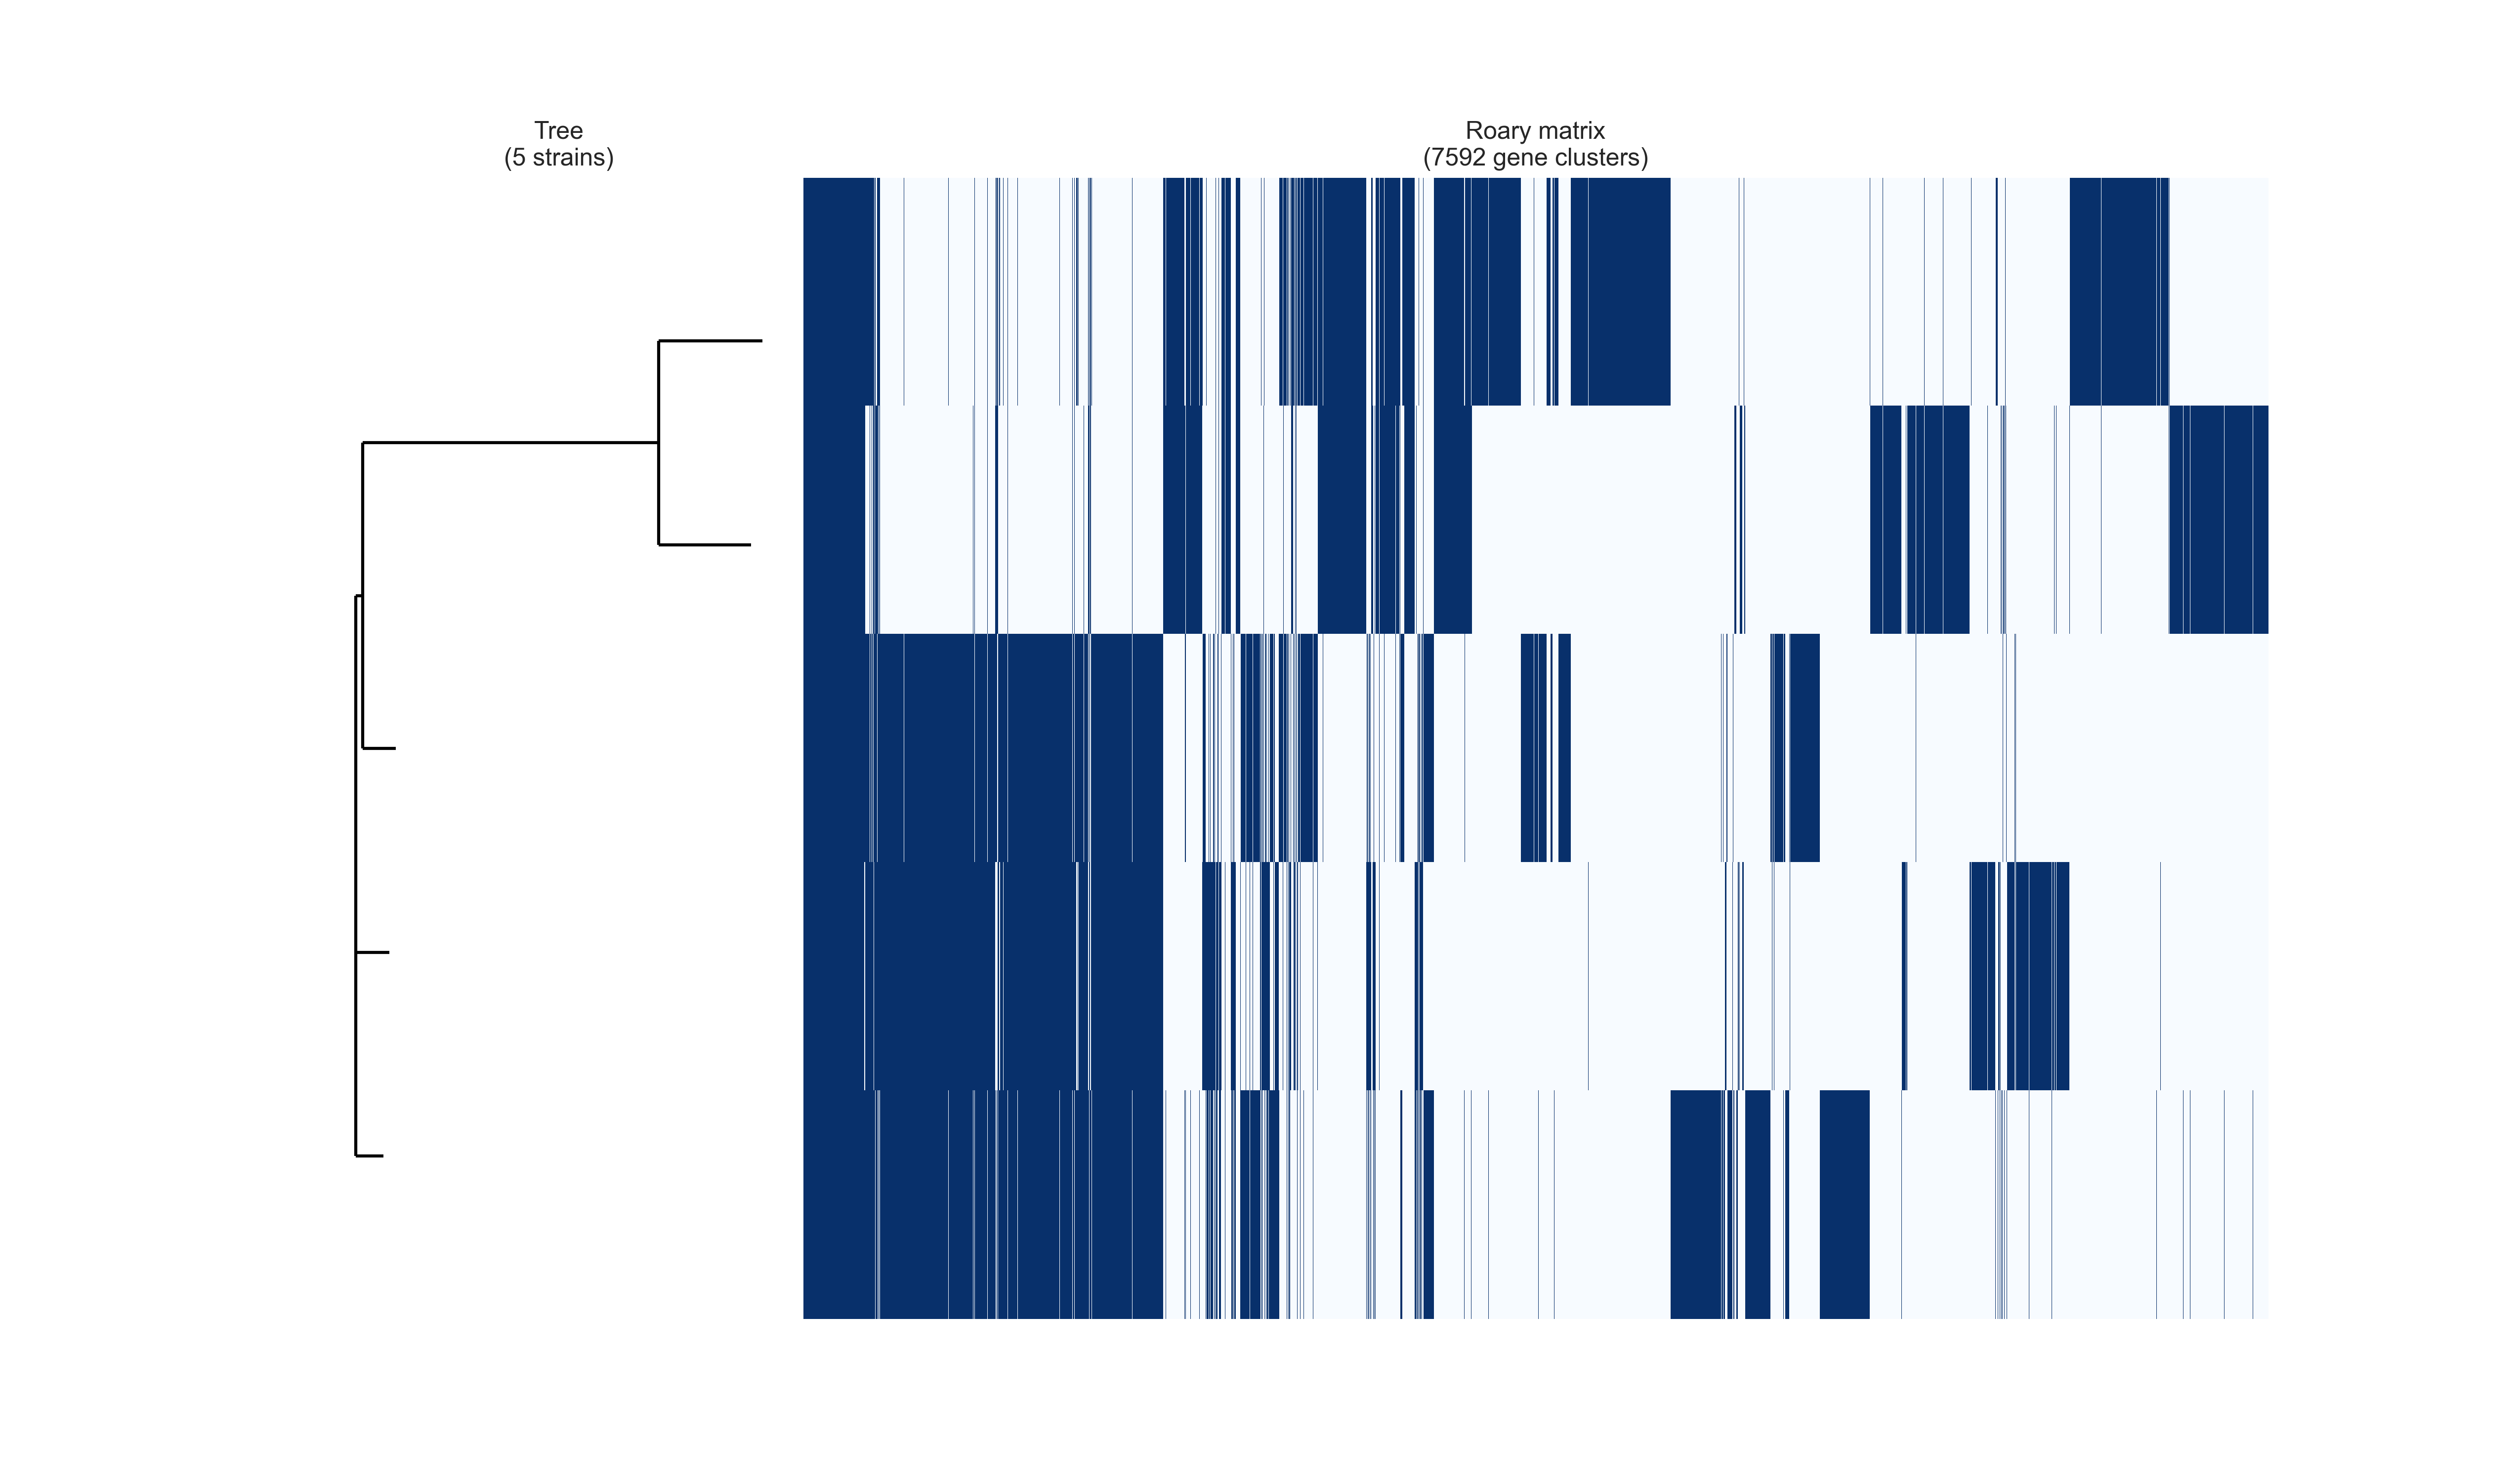

pangenome_matrix.png


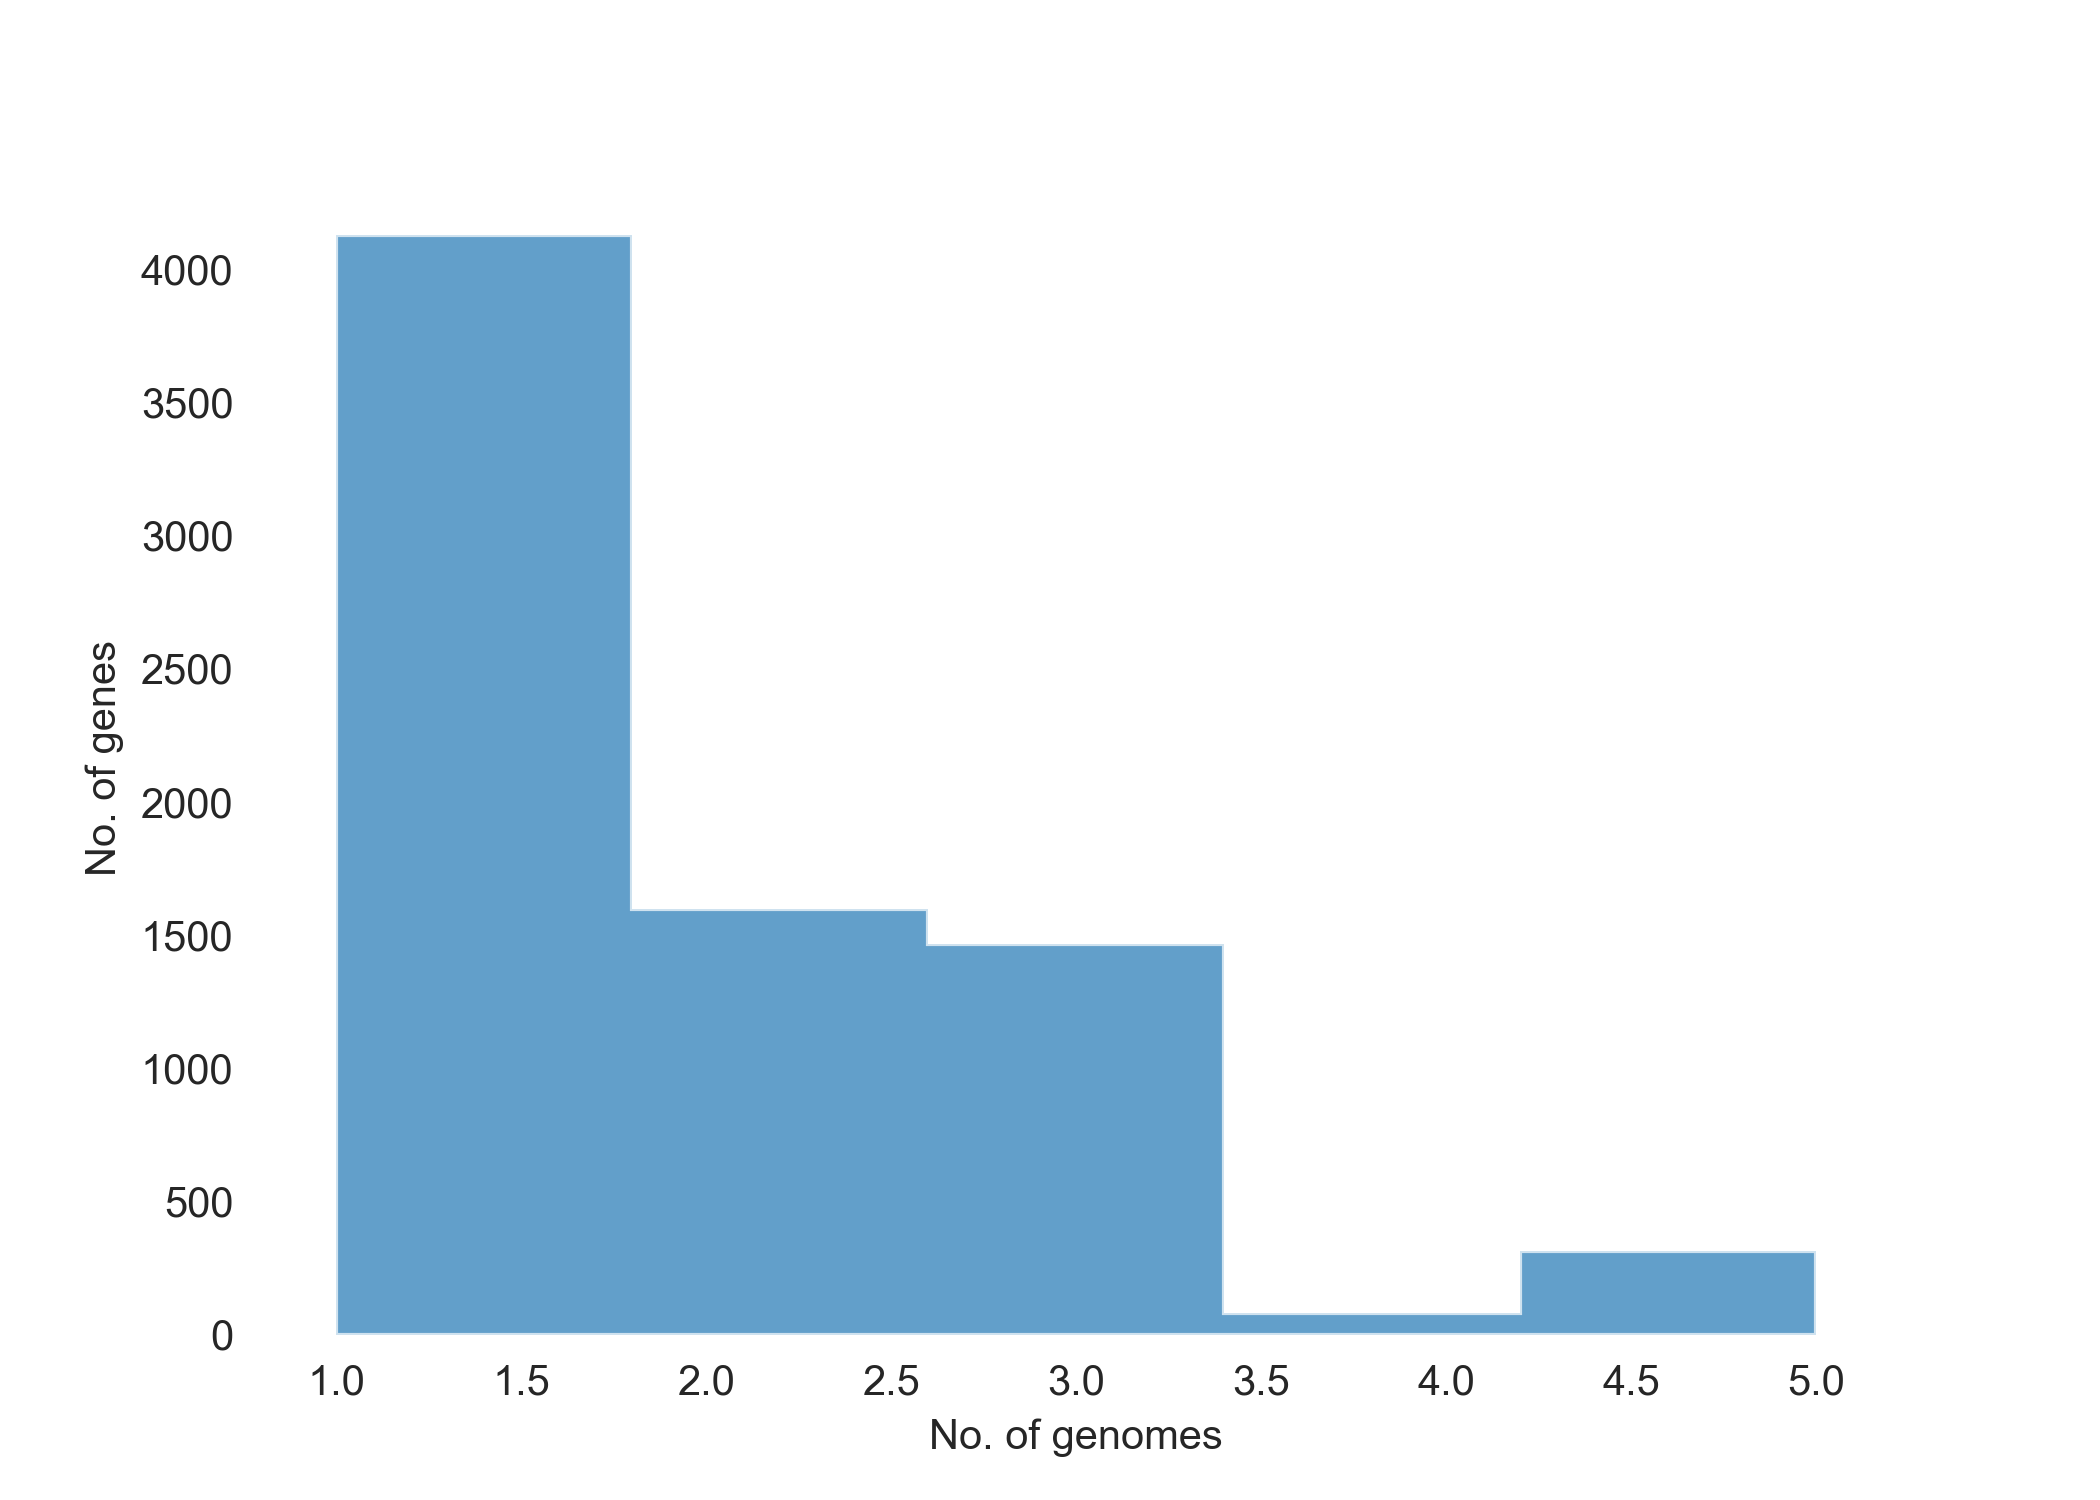

pangenome_frequency.png


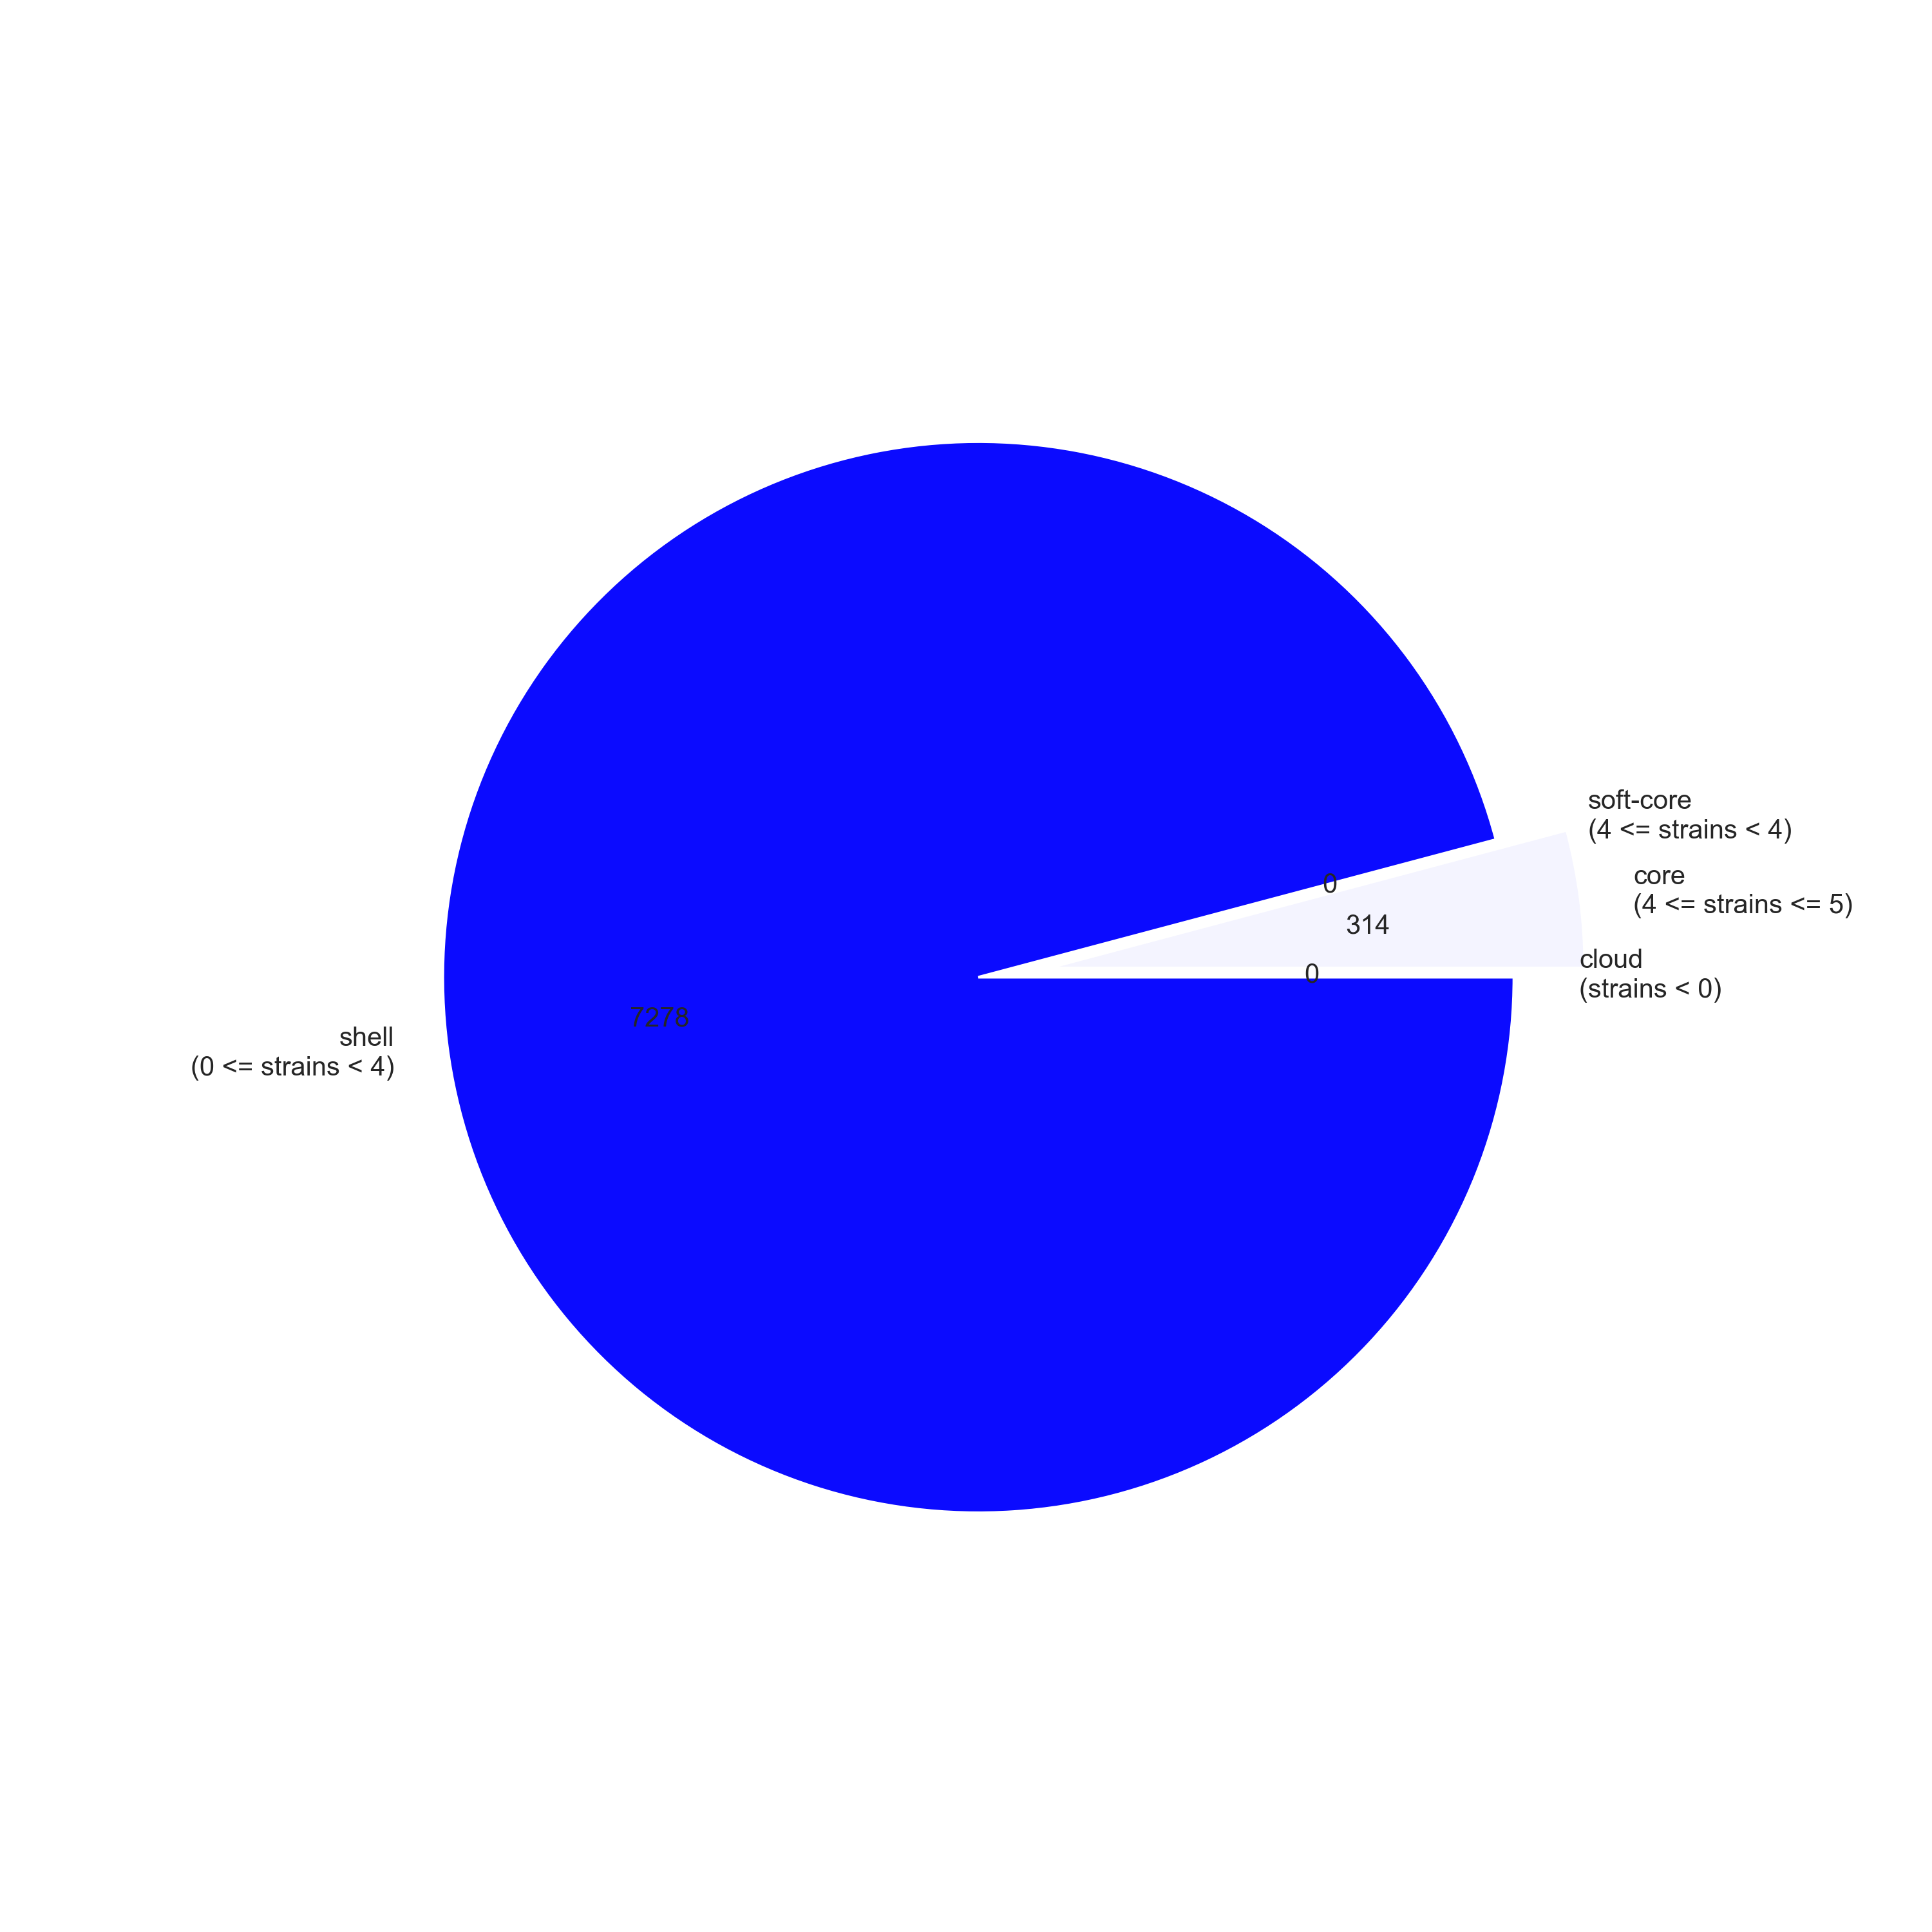

pangenome_pie.png


In [21]:
os.chdir(pwd + "/gff_files/roary")
for imageName in glob('*.png'):
    display(Image(filename=imageName))
    print(imageName)
os.chdir(pwd)

In [22]:
subprocess.run(f"rm {taxon_file}.json""", shell=True)
!rm accession_list.txt
!rm -r info_table.tsv
#!rm -r gff_files/*
#!rm annotated_genomes/*
subprocess.run(f"rm {taxon_file}.zip""", shell=True)
!rm README.md

In [23]:
#criteria for genome selection to strict (assembly-source genbank)? draft sequence -> we do annotation right?
#GenomeDiagramm library
#conda the best way?
#voila

#is it possible to have interaction in jupyter notebook
#circos (input-data?)
# download blast - read up on algorithm
#antismash


#1.upload own genome data
#if empty -> trna-scan, barrnap, prodigal (pcap includes them all)
#anvio